# Predict Customer Personality to Boost up Marketing Campaign Performance by using Machine Learning

A company can experience rapid growth when it understands its customers' personality behaviors, enabling it to provide better services and benefits to potential loyal customers. By analyzing historical marketing campaign data to <b>improve performance and target the right customers for transactions on the company's platform</b>, our primary focus is to create a predictive clustering model to facilitate decision-making within the company.

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyoff

import warnings
warnings.filterwarnings("ignore") # Ignores any warning

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid")

pd.set_option('float_format', '{:.2f}'.format)  # Scientific format with 2 numbers
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib as mp
%matplotlib inline
import textwrap
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap

import matplotlib as mp
%matplotlib inline
import textwrap
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
# Load dataset
df = pd.read_csv('marketing_campaign_data.csv')

In [ ]:
# Check dataset
df.sample(3)

Unnamed: 0    ID  Year_Birth Education Marital_Status      Income  \
2127        2127  6292        1986        S3        Menikah 82333000.00   
1248        1248  4298        1973        S3    Bertunangan 20427000.00   
534          534  8724        1982        S1         Lajang 28567000.00   

      Kidhome  Teenhome Dt_Customer  Recency  MntCoke  MntFruits  \
2127        0         0  30-03-2013       60  1311000          0   
1248        1         0  24-03-2014       63     5000          0   
534         1         0  17-06-2013       57    11000       3000   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
2127           359000            46000             89000         17000   
1248             4000                0                 0          1000   
534             22000             2000              2000          6000   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
2127                  1                4                    3   
1248                  1                1                    0   
534                   2                2                    0   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
2127                 10                  2             0             0   
1248                  2                  8             0             0   
534                   3                  6             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
2127             1             0             0         0              3   
1248             0             0             0         0              3   
534              0             0             0         0              3   

      Z_Revenue  Response  
2127         11         1  
1248         11         0  
534          11         0

### Data Dictionary
1. ID: Customer identifier
2. Year_Birth: The year of birth of the customers
3. Education: Customer’s level of education
4. Marital_Status: Customer’s marital status
5. Income: Customer’s monthly household income (IDR)
6. Kidhome: Number of small children in customer’s household
7. Teenhome: Number of teenagers in customer’s household
8. Dt_Customer: Date of customer’s enrolment with the company
9. Recency:	Number of days since the last purchase
10. MntCoke: Amount spent on coca-cola products (IDR)
11. MntFruits: Amount spent on fruits products (IDR)
12. MntMeatProducts: Amount spent on meat products (IDR)
13. MntFishProducts: Amount spent on fish products (IDR)
14. MntSweetProducts: Amount spent on sweet products (IDR)
15. MntGoldProds: Amount spent on gold products (IDR)
16. NumDealsPurchases: Number of purchases made with discount
17. NumWebPurchases: Number of purchases made through company’s web site
18. NumCatalogPurchases: Number of purchases made using catalogue
19. NumStorePurchases: Number of purchases made directly in stores
20. NumWebVisitsMonth: Number of visits to company’s web site in the last month
21. AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
22. AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
23. AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
24. AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
25. AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
26. Complain: 1 if customer complained
27. Z_CostContact: Fixed contact cost in marketing campaigns
28. Z_Revenue: Revenue generated from marketing campaigns
29. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

## Exploratory Data Analysis

In [ ]:
# drop unnecessary column
df.drop(['Unnamed: 0'], inplace=True, axis=1)

In [ ]:
# Check data types and detect the presence of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Check total null values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**Summary:**
- The dataset consists of 2240 rows and 29 columns.
- There are missing values in the Income column (24 data points).
- The data type in the Income column has been changed to integer, and the Dt_Customer column has been changed to date time.
- It might be better to standardize the column names and their content to use a single language.

In [ ]:
# Check duplicated data
df.duplicated().sum()

0

In [ ]:
df.duplicated(subset=['ID']).sum()

0

In [ ]:
df['ID'].nunique()

2240

**Summary:**
- Dataset contains no duplicates

In [ ]:
# Check unique values
for x in df.columns :
    uniq = list(df[x].unique())
    uniq.sort()

    print (f'Column {x}:')
    if len(uniq) > 0:
        unq = list(uniq[:])
        print (f'{uniq}')
    else:
        print (f'{uniq}')
    print("--" * 50, end='\n\n')

Column ID:
[0, 1, 9, 13, 17, 20, 22, 24, 25, 35, 48, 49, 55, 67, 73, 75, 78, 87, 89, 92, 113, 115, 123, 125, 143, 146, 153, 158, 164, 175, 176, 178, 182, 193, 194, 195, 199, 202, 203, 213, 217, 221, 231, 232, 234, 236, 238, 241, 246, 247, 252, 254, 255, 257, 263, 269, 271, 273, 274, 286, 291, 295, 304, 309, 310, 313, 322, 326, 332, 339, 340, 347, 359, 361, 367, 368, 375, 378, 380, 387, 405, 425, 433, 437, 448, 450, 451, 453, 454, 455, 456, 460, 466, 477, 486, 492, 498, 500, 503, 520, 521, 523, 524, 528, 531, 535, 538, 544, 550, 564, 569, 574, 577, 590, 591, 606, 607, 610, 615, 618, 624, 626, 635, 640, 641, 642, 663, 675, 679, 692, 697, 701, 702, 709, 713, 716, 736, 737, 738, 749, 760, 762, 771, 773, 793, 796, 798, 800, 803, 807, 810, 819, 821, 830, 832, 833, 837, 839, 843, 849, 850, 851, 868, 873, 879, 880, 891, 895, 898, 902, 905, 907, 916, 922, 933, 938, 940, 942, 944, 945, 946, 948, 954, 955, 961, 965, 966, 967, 968, 975, 977, 979, 983, 988, 999, 1000, 1008, 1010, 1012, 1016, 1020, 

**Summary:**
- There are 6 categories of marital status: Menikah, Bertunangan, Lajang, Cerai, Janda, and Duda. The categorization of marital status can be simplified into `Married`, `Single`, and `Divorced`. In this simplification, customers with the marital status Widow and Widower are combined into the Divorced category, and Engaged is combined with the Single category.

### Feature Engineering

In [ ]:
# Add an Age Column to the Dataset
currentYear = 2014 # based on data
df['Age'] = currentYear - df['Year_Birth']

Umur customer dapat disederhanakan lagi menjadi 3 kategori, yaitu:
- Young Adult: < 30 tahun
- Adult: 30-45 tahun
- Senior Adult: > 45 tahun  

[Source](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.semanticscholar.org%2Fpaper%2FHuman-Age-Group-Classification-Using-Facial-Bhat-V.K.Patil%2F19ddb412336ce633c1fe21544605c7bd65ff8d66&psig=AOvVaw3Sm17zYYJRrkisQVRyg4rf&ust=1684919686463000&source=images&cd=vfe&ved=0CBMQjhxqFwoTCJDXlY2Ni_8CFQAAAAAdAAAAABAI)

In [ ]:
# Add an Age_Category Column to the Dataset

def age_group(x):
    if x < 30:
        group = 'Young Adult'
    elif x < 46:
        group = 'Adult'
    else:
        group = 'Senior Adult'

    return group

df['Age_Category'] = df['Age'].apply(lambda x: age_group(x))

In [ ]:
# Add an Total_Child Column to the Dataset
df['Total_Child'] = df['Kidhome'] + df['Teenhome']

In [ ]:
# Add an Customer_Category Column to the Dataset
df['Is_Parents'] = df['Total_Child'].apply(lambda x : 'Yes' if x > 0 else 'No')

In [ ]:
# Add an Spending Column to the Dataset
df['Spending'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [ ]:
# Add an Total_AcceptedCmp Column to the Dataset
df['Total_AcceptedCmp'] = df['AcceptedCmp1'].astype("int64") + df['AcceptedCmp2'].astype("int64") + df['AcceptedCmp3'].astype("int64") + df['AcceptedCmp4'].astype("int64") + df['AcceptedCmp5'].astype("int64")

In [ ]:
# Add an Total_Purchases Column to the Dataset
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [ ]:
# Add an Conversion_Rate column to the dataset
df['Conversion_Rate'] = np.round(df['NumWebPurchases'] / df['NumWebVisitsMonth'], 2)
df['Conversion_Rate'].fillna(0, inplace=True) # due to the presence of null values in NumWebPurchases column
df['Conversion_Rate'].replace([np.inf, -np.inf], 0, inplace=True) # due to the presence of null values in NumWebVisitsMonth

In [ ]:
# Check the new dataset
df.sample()

ID  Year_Birth Education Marital_Status      Income  Kidhome  Teenhome  \
395  3428        1991        S3    Bertunangan 68682000.00        0         0   

    Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  \
395  06-10-2013       56   919000          0           505000   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
395            99000             30000         45000                  1   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
395                4                    9                 10   

     NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
395                  2             0             0             0   

     AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
395             0             0         0              3         11         0   

     Age Age_Category  Total_Child Is_Parents  Spending  Total_AcceptedCmp  \
395   23  Young Adult            0         No   1598000                  0   

     Total_Purchases  Conversion_Rate  
395               24             2.00

### Business Understanding

#### Univariate Analysis

In [ ]:
cats = []
nums = []

for a, i in df.items():
    if a != 'Dt_Customer': # To exclude the 'Dt_Customer' column because it is neither categorical nor numerical in type
        if i.dtype == 'object':
            cats.append(a)
        else:
            nums.append(a)

print(f'Categorical columns: {cats}')
print(f'Numerical columns: {nums}')

Categorical columns: ['Education', 'Marital_Status', 'Age_Category', 'Is_Parents']
Numerical columns: ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Total_Child', 'Spending', 'Total_AcceptedCmp', 'Total_Purchases', 'Conversion_Rate']


In [ ]:
df[cats].describe().T

count unique      top  freq
Education       2240      5       S1  1127
Marital_Status  2240      6  Menikah   864
Age_Category    2240      3    Adult  1014
Is_Parents      2240      2      Yes  1602

In [ ]:
for column in cats:
    print(f'''Value count kolom {column}:''')
    print(df[column].value_counts())
    print()

Value count kolom Education:
S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: Education, dtype: int64

Value count kolom Marital_Status:
Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: Marital_Status, dtype: int64

Value count kolom Age_Category:
Adult           1014
Senior Adult    1005
Young Adult      221
Name: Age_Category, dtype: int64

Value count kolom Is_Parents:
Yes    1602
No      638
Name: Is_Parents, dtype: int64



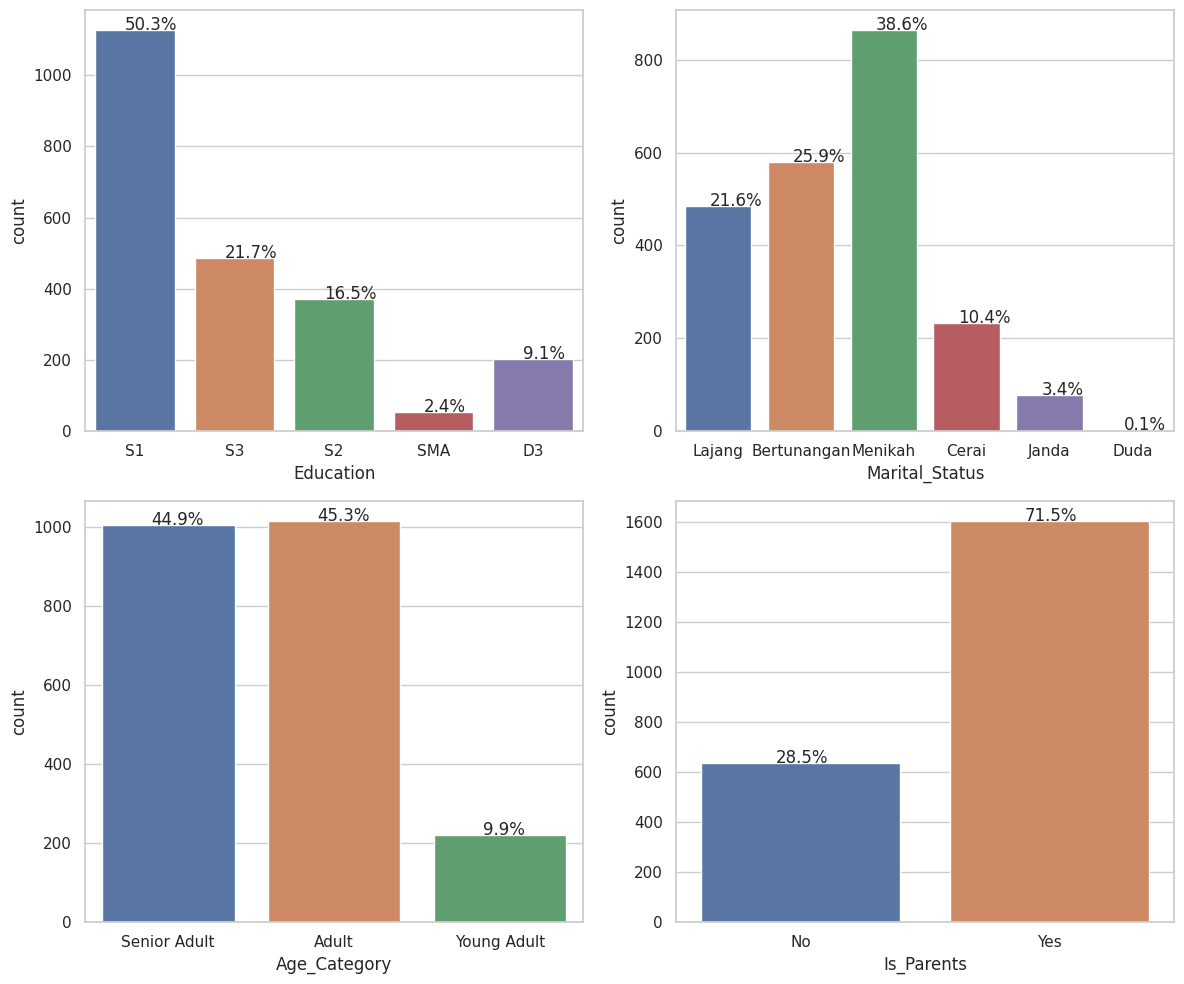

In [ ]:
plt.figure(figsize=(12, 10))
for i in range(0, len(cats)):
    plt.subplot(2, 2, i + 1)
    ax = sns.countplot(x=df[cats[i]])

    total = len(df[cats[i]])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_height()
        ax.annotate(percentage, (x, y), fontsize=12)

    plt.xticks()
    plt.tight_layout()

plt.show()

**Summary:**
- There are 5 categories of education levels among customers: SMA, D3, S1, S2, and S3. The majority of customers hold a Bachelor's Degree (S1) as their education level.
- There are 6 categories of marital status: Lajang, Bertunangan, Menikah, Cerai, Janda, and Duda. The majority of customers are Menikah as their marital status.
- There are 3 categories of age: Young Adult, Adult, and Senior Adult. The majority of customers fall into the Adult age category.
- The `Is_Parents` column has two values: `Yes` if the customer has children and `No` if the customer does not have children. The majority of customers fall into the parents category.

In [ ]:
df[nums].describe().T

count        mean         std        min         25%  \
ID                  2240.00     5592.16     3246.66       0.00     2828.25   
Year_Birth          2240.00     1968.81       11.98    1893.00     1959.00   
Income              2216.00 52247251.35 25173076.66 1730000.00 35303000.00   
Kidhome             2240.00        0.44        0.54       0.00        0.00   
Teenhome            2240.00        0.51        0.54       0.00        0.00   
Recency             2240.00       49.11       28.96       0.00       24.00   
MntCoke             2240.00   303935.71   336597.39       0.00    23750.00   
MntFruits           2240.00    26302.23    39773.43       0.00     1000.00   
MntMeatProducts     2240.00   166950.00   225715.37       0.00    16000.00   
MntFishProducts     2240.00    37525.45    54628.98       0.00     3000.00   
MntSweetProducts    2240.00    27062.95    41280.50       0.00     1000.00   
MntGoldProds        2240.00    44021.88    52167.44       0.00     9000.00   
NumDealsPurchases   2240.00        2.33        1.93       0.00        1.00   
NumWebPurchases     2240.00        4.08        2.78       0.00        2.00   
NumCatalogPurchases 2240.00        2.66        2.92       0.00        0.00   
NumStorePurchases   2240.00        5.79        3.25       0.00        3.00   
NumWebVisitsMonth   2240.00        5.32        2.43       0.00        3.00   
AcceptedCmp3        2240.00        0.07        0.26       0.00        0.00   
AcceptedCmp4        2240.00        0.07        0.26       0.00        0.00   
AcceptedCmp5        2240.00        0.07        0.26       0.00        0.00   
AcceptedCmp1        2240.00        0.06        0.25       0.00        0.00   
AcceptedCmp2        2240.00        0.01        0.11       0.00        0.00   
Complain            2240.00        0.01        0.10       0.00        0.00   
Z_CostContact       2240.00        3.00        0.00       3.00        3.00   
Z_Revenue           2240.00       11.00        0.00      11.00       11.00   
Response            2240.00        0.15        0.36       0.00        0.00   
Age                 2240.00       45.19       11.98      18.00       37.00   
Total_Child         2240.00        0.95        0.75       0.00        0.00   
Spending            2240.00   605798.21   602249.29    5000.00    68750.00   
Total_AcceptedCmp   2240.00        0.30        0.68       0.00        0.00   
Total_Purchases     2240.00       14.86        7.68       0.00        8.00   
Conversion_Rate     2240.00        1.09        1.33       0.00        0.33   

                            50%         75%          max  
ID                      5458.50     8427.75     11191.00  
Year_Birth              1970.00     1977.00      1996.00  
Income              51381500.00 68522000.00 666666000.00  
Kidhome                    0.00        1.00         2.00  
Teenhome                   0.00        1.00         2.00  
Recency                   49.00       74.00        99.00  
MntCoke               173500.00   504250.00   1493000.00  
MntFruits               8000.00    33000.00    199000.00  
MntMeatProducts        67000.00   232000.00   1725000.00  
MntFishProducts        12000.00    50000.00    259000.00  
MntSweetProducts        8000.00    33000.00    263000.00  
MntGoldProds           24000.00    56000.00    362000.00  
NumDealsPurchases          2.00        3.00        15.00  
NumWebPurchases            4.00        6.00        27.00  
NumCatalogPurchases        2.00        4.00        28.00  
NumStorePurchases          5.00        8.00        13.00  
NumWebVisitsMonth          6.00        7.00        20.00  
AcceptedCmp3               0.00        0.00         1.00  
AcceptedCmp4               0.00        0.00         1.00  
AcceptedCmp5               0.00        0.00         1.00  
AcceptedCmp1               0.00        0.00         1.00  
AcceptedCmp2               0.00        0.00         1.00  
Complain                   0.00        0.00         1.00  
Z_CostContact              3.00

**Summary:**
- The birth year of customers varies from `1893-1996`, with the age varies from `18-121 year`.
- The total monthly income of customers ranges from `1.730.000-666.666.000 IDR`.
- The total number of young children and teenagers owned by customers ranges from `0-2 children`, with the total children are `0-3 children`.
- The total days since the last purchase made by customers vary from `0-99 days`.
- The money customers spent on buying Coca-Cola ranges from `0-1.493.000 IDR`, fruits ranges from `0-199.000 IDR`, meat ranges from `0-1.725.000 IDR`, fish ranges from `0-259.000 IDR`, sweet products ranges from `0-263.000 IDR`, and gold products ranges from `0-362.000 IDR`, with the total spending customer's varies from `0-2.525.000 IDR`.
- The total purchases made with a discount range from `0-15 purchases`, made through the company's website range from `0-27 purchases`, made using a catalog range from `0-28 purchases`, and made directly in stores range from `0-13 purchases`, with the total purchases varies from `0-44 purchases`.
- The total visits to the company's website in the last month range from `0-20 times`.
- For campaigns 1-5, there are customers who accept and do not accept the campaign, with total campaign accepted varies from `0-4 campaign`. Then only 334 (14.91%) customers accepted the last campaign, while the remaining (85.09%) did not.
- Some customers have filed complaints, while others have not.
- The conversion rate varies from `0-27`.

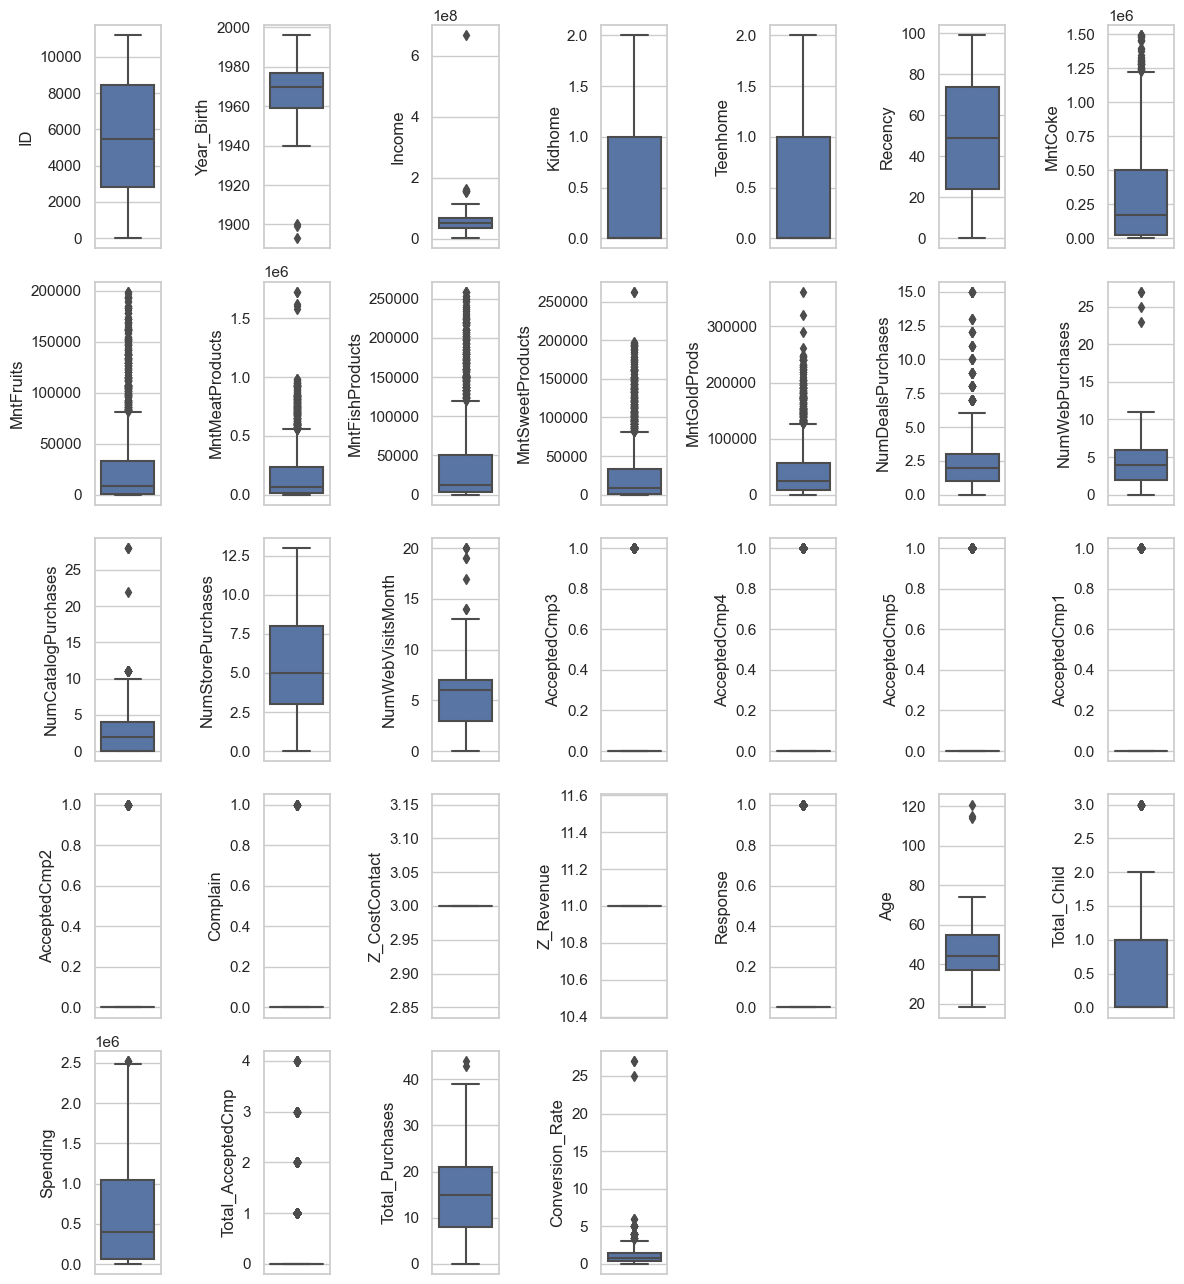

In [ ]:
plt.figure(figsize=(12, 13))
for i in range(0, len(nums)):
    plt.subplot(5, 7, i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

In [ ]:
outlier_data = []

for col in nums:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    # Identification of Outliers
    filter_outlier = (df[col] < low_limit) | (df[col] > high_limit)
    num_outliers = filter_outlier.sum()
    num_no_outliers = len(df) - num_outliers

    outlier_data.append({
        "Column Name": col,
        "is Outlier": num_outliers > 0,
        "Outlier": num_outliers,
        "No Outlier": num_no_outliers
    })

outlier_df = pd.DataFrame(outlier_data)
outlier_df

Column Name  is Outlier  Outlier  No Outlier
0                    ID       False        0        2240
1            Year_Birth        True        3        2237
2                Income        True        8        2232
3               Kidhome       False        0        2240
4              Teenhome       False        0        2240
5               Recency       False        0        2240
6               MntCoke        True       35        2205
7             MntFruits        True      227        2013
8       MntMeatProducts        True      175        2065
9       MntFishProducts        True      223        2017
10     MntSweetProducts        True      248        1992
11         MntGoldProds        True      207        2033
12    NumDealsPurchases        True       86        2154
13      NumWebPurchases        True        4        2236
14  NumCatalogPurchases        True       23        2217
15    NumStorePurchases       False        0        2240
16    NumWebVisitsMonth        True        8        2232
17         AcceptedCmp3        True      163        2077
18         AcceptedCmp4        True      167        2073
19         AcceptedCmp5        True      163        2077
20         AcceptedCmp1        True      144        2096
21         AcceptedCmp2        True       30        2210
22             Complain        True       21        2219
23        Z_CostContact       False        0        2240
24            Z_Revenue       False        0        2240
25             Response        True      334        1906
26                  Age        True        3        2237
27          Total_Child        True       53        2187
28             Spending        True        3        2237
29    Total_AcceptedCmp        True      463        1777
30      Total_Purchases        True        2        2238
31      Conversion_Rate        True       66        2174

**Summary:**
- Outliers are present in the columns `Year_Birth`, `Income`, `MntCoke`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`, `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumWebVisitsMonth`, `Age`, `Total_Child`, `Spending`, `Total_AcceptedCmp`, `Total_Purchases` and `Conversion_Rate`.

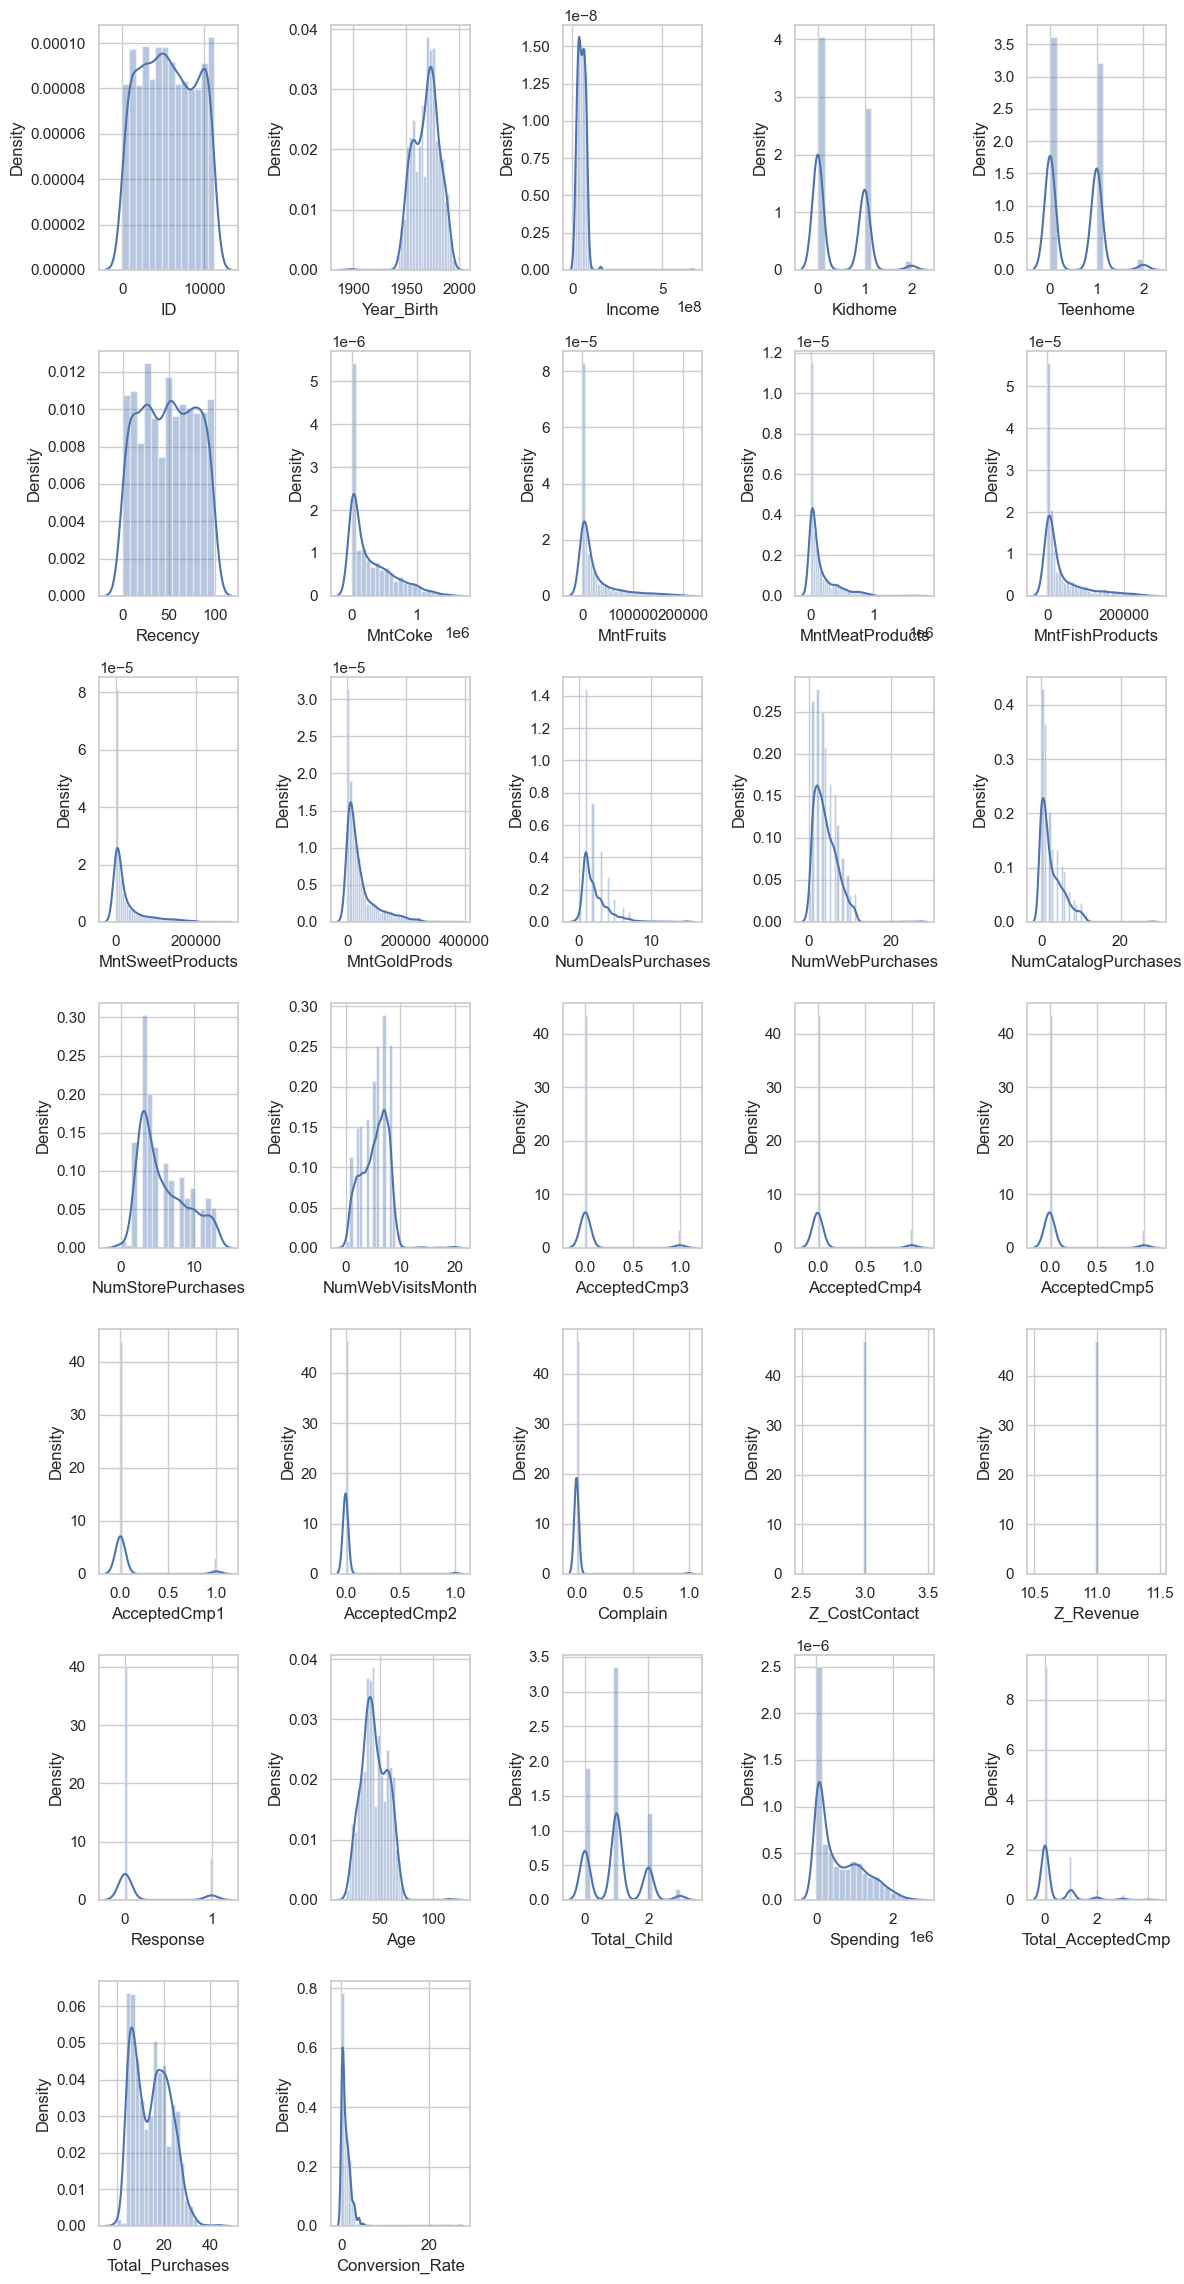

In [ ]:
plt.figure(figsize=(12, 23))
for i in range(0, len(nums)):
    plt.subplot(7, 5, i+1)
    sns.distplot(df[nums[i]])
    plt.tight_layout()

**Summary:**
- `ID`, `Recency`: Normal Distribution
- `Income`, `MntCoke`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`, `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`, `NumWebVisitMonth`, `Age`, `Spending`, `Conversion_Rate`: Positively Skewed
- `Year_Birth`: Negatively Skewed
- `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, `AcceptedCmp1`, `AcceptedCmp2`, `Complain`, `Response`, `Total_Purchases`: Bimodal Distribution
- `Kidhome`, `Teenhome`, `Total_Child`, `Total_AcceptedCmp`: Multimodal Distribution
- `Z_CostContact`, `Z_Revenue`: Uniform Distribution

#### Bivariate Analysis

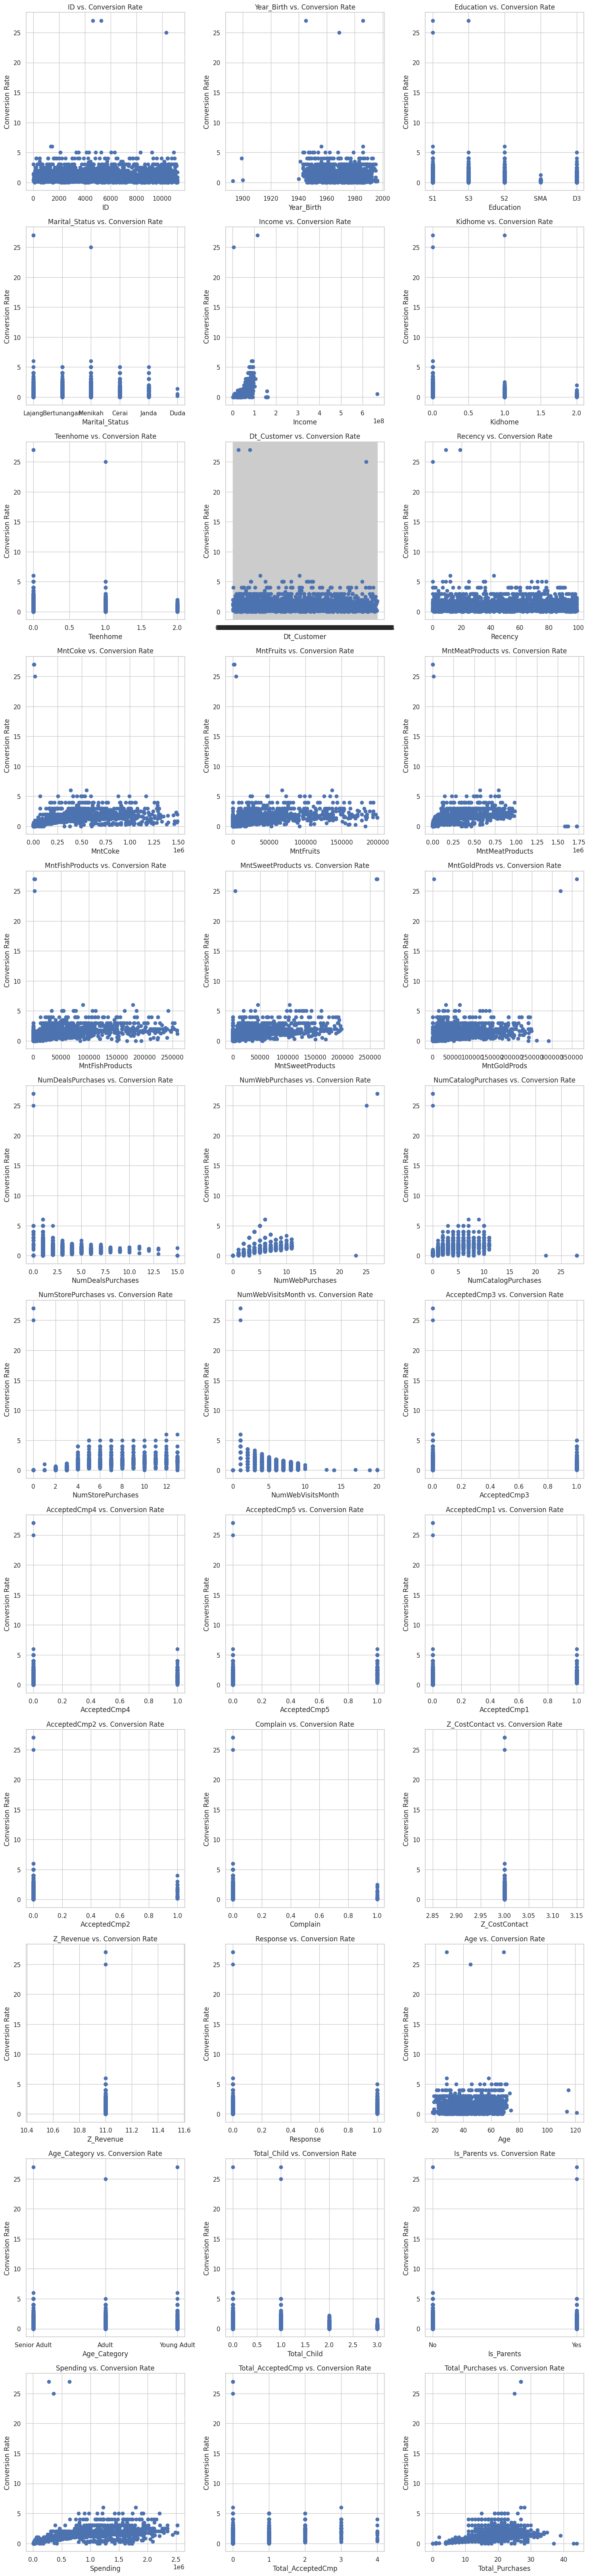

In [ ]:
plt.figure(figsize=(15, 70))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(13, 3, i+1)
    plt.scatter(df[column], df['Conversion_Rate'])
    plt.title(f'{column} vs. Conversion Rate')
    plt.xlabel(column)
    plt.ylabel('Conversion Rate')

plt.tight_layout()
plt.show()

#### Multivariate Analysis

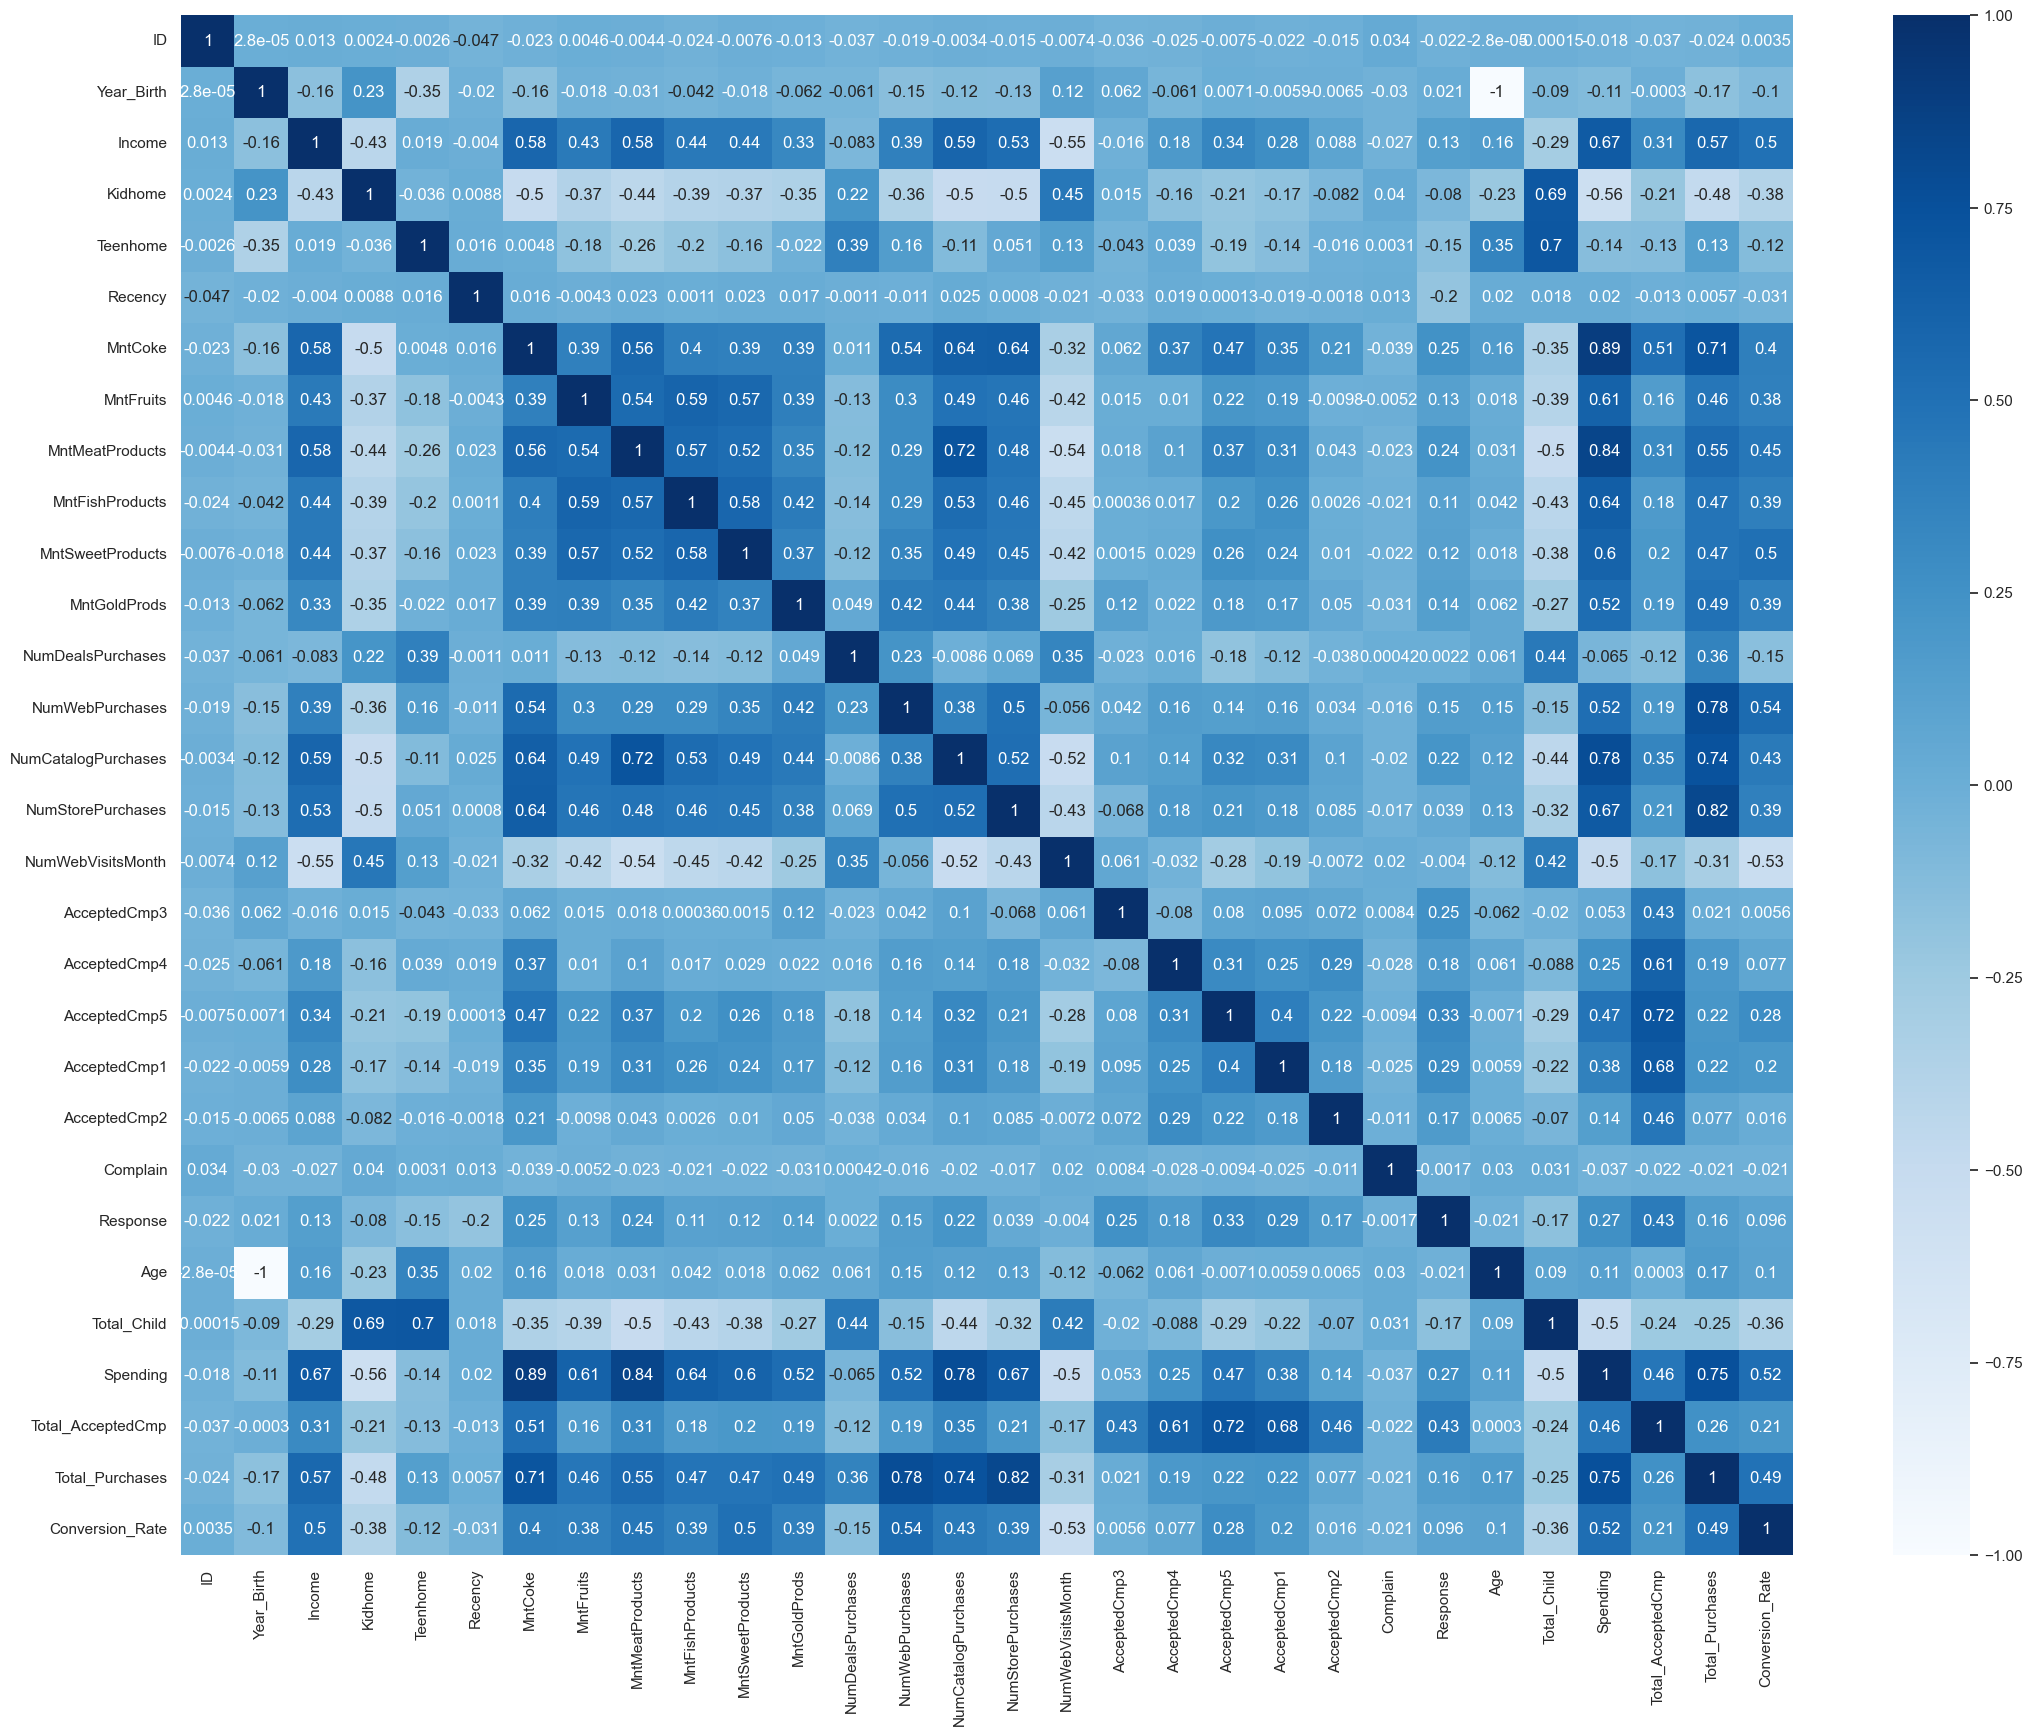

In [ ]:
df1 = df.drop(['Z_CostContact', 'Z_Revenue'], axis = 1)

plt.figure(figsize=(26,20))
sns.heatmap(df1.corr(), annot=True, cmap='Blues')
plt.show()

**Summary:**
- The feature with the highest correlation value with Conversion_Rate is NumWebPurchases, which has a correlation of `0.54`. This means that if a customer has more purchases made through the company’s website, they have a higher conversion rate.
- The order of feature correlations with the `Conversion_Rate`, from highest to lowest, is as follows: `NumWebPurchases`; `NumWebVisitsMonth`; `Spending`; `Income` and `MntSweetProducts`; `Total_Purchases`; `MntMeatProducts`; `NumCatalogPurchases`; `MntCoke`; `MntFishProducts`, `MntGoldProds` and `NumStorePurchases`; `Kidhome` and `MntFruits`; `Total_Child`; `AcceptedCmp5`; `Total_AcceptedCmp`; `AcceptedCmp1`; `NumDealsPurchases`; `Teenhome`; `Year_Birth`, `Age`; `Response`; `AcceptedCmp4`; `Complain`; `AcceptedCmp2`; `Recency`; `AcceptedCmp3`; `ID`. The higher the correlation of a feature with the `Conversion_Rate`, indicating that the feature has a stronger influence on the conversion rate.

#### `Conversion_Rate` Analysis Based on `Income`

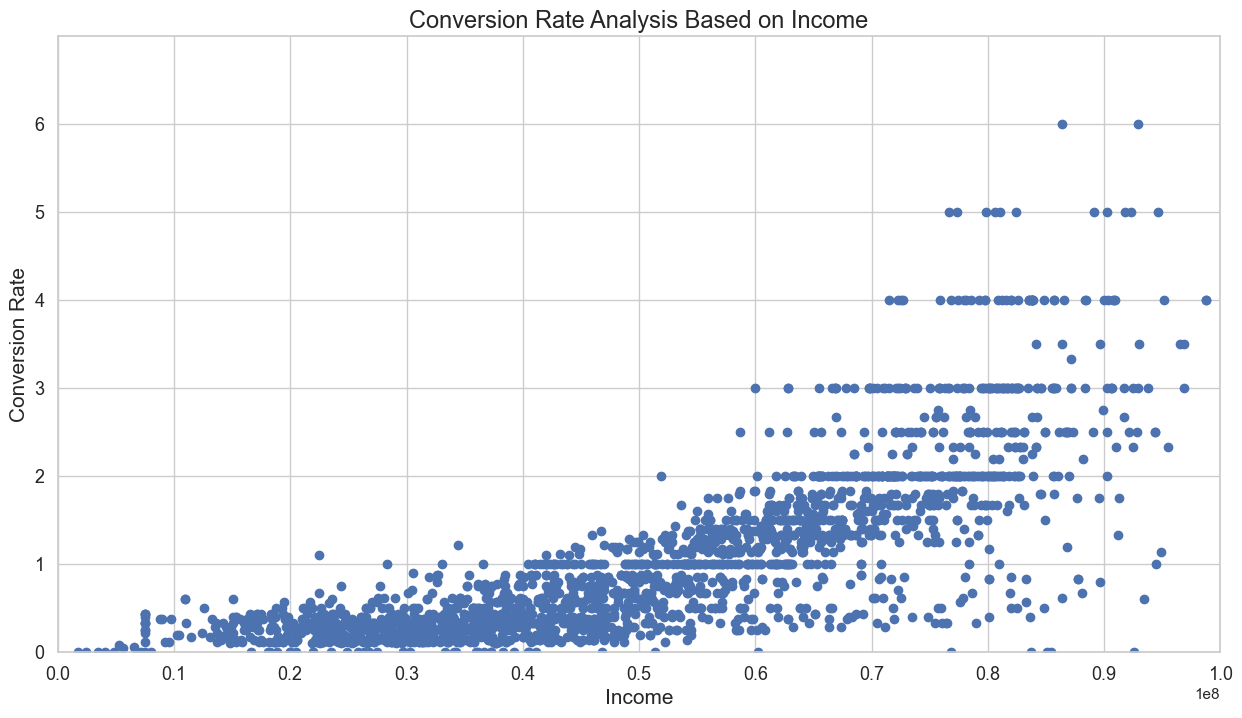

In [ ]:
plt.scatter(df['Income'], df['Conversion_Rate'])
plt.xlabel('Income', fontsize=15)
plt.xlim(0, 100000000)
plt.xticks(range(0, 110000000, 10000000), fontsize=13)
plt.ylabel('Conversion Rate', fontsize=15)
plt.ylim(0, 7)
plt.yticks(range(0, 7, 1), fontsize=13)
plt.title('Conversion Rate Analysis Based on Income', fontsize=17)
plt.show()

**Insight:**
The larger a customer's total income, the more it can potentially boost the conversion rate, where the increase in conversion rate becomes noticeable when their monthly income exceeds `60.000.000 IDR`.

#### `Spending` and `Total_Purchases` Analysis Based on `Income`

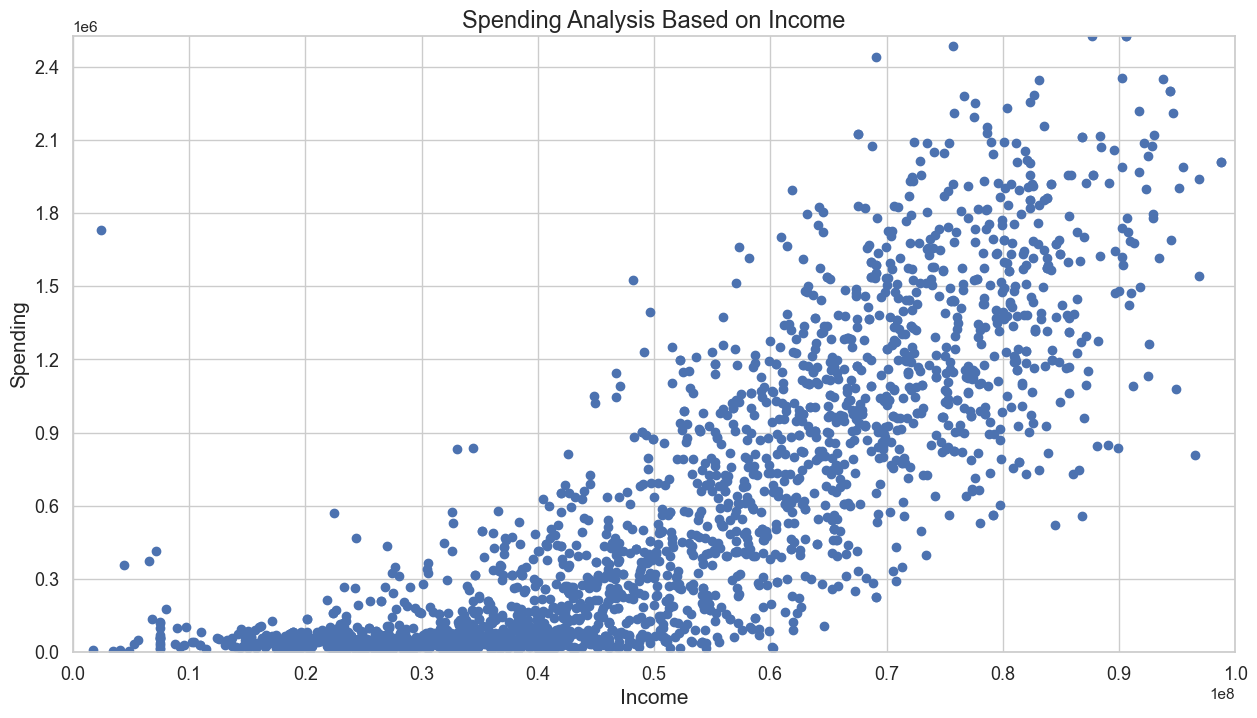

In [ ]:
plt.scatter(df['Income'], df['Spending'])
plt.xlabel('Income', fontsize=15)
plt.xlim(0, 100000000)
plt.xticks(range(0, 110000000, 10000000), fontsize=13)
plt.ylabel('Spending', fontsize=15)
plt.ylim(0, 2525000)
plt.yticks(range(0, 2620000, 300000), fontsize=13)
plt.title('Spending Analysis Based on Income', fontsize=17)
plt.show()

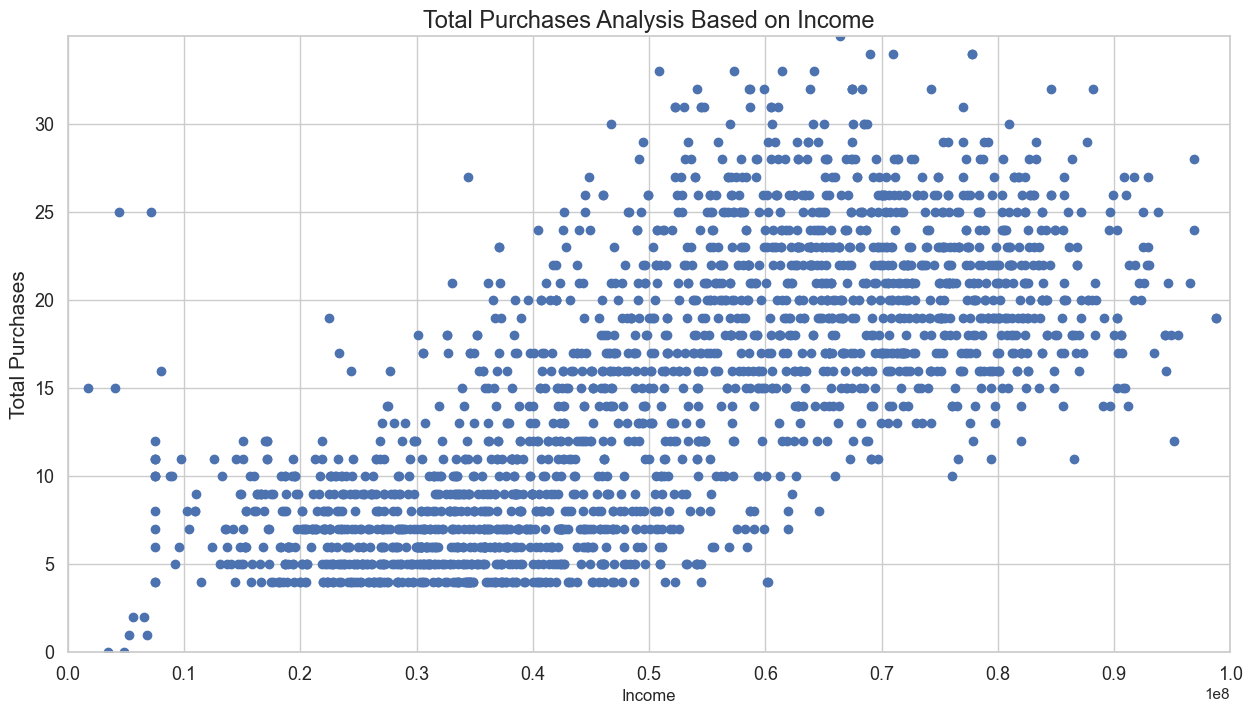

In [ ]:
plt.scatter(df['Income'], df['Total_Purchases'])
plt.xlabel('Income')
plt.xlim(0, 100000000)
plt.xticks(range(0, 110000000, 10000000), fontsize=13)
plt.ylabel('Total Purchases', fontsize=15)
plt.ylim(0, 35)
plt.yticks(range(0, 35, 5), fontsize=13)
plt.title('Total Purchases Analysis Based on Income', fontsize=17)
plt.show()

**Insight:**
Supported by other insights, where higher income tends to increase both spending and total purchases made by customers, especially when the income exceeds `60.000.000 IDR`.

#### `Convertion_Rate` Analysis Based on `Spending` and `Total_Purchases`

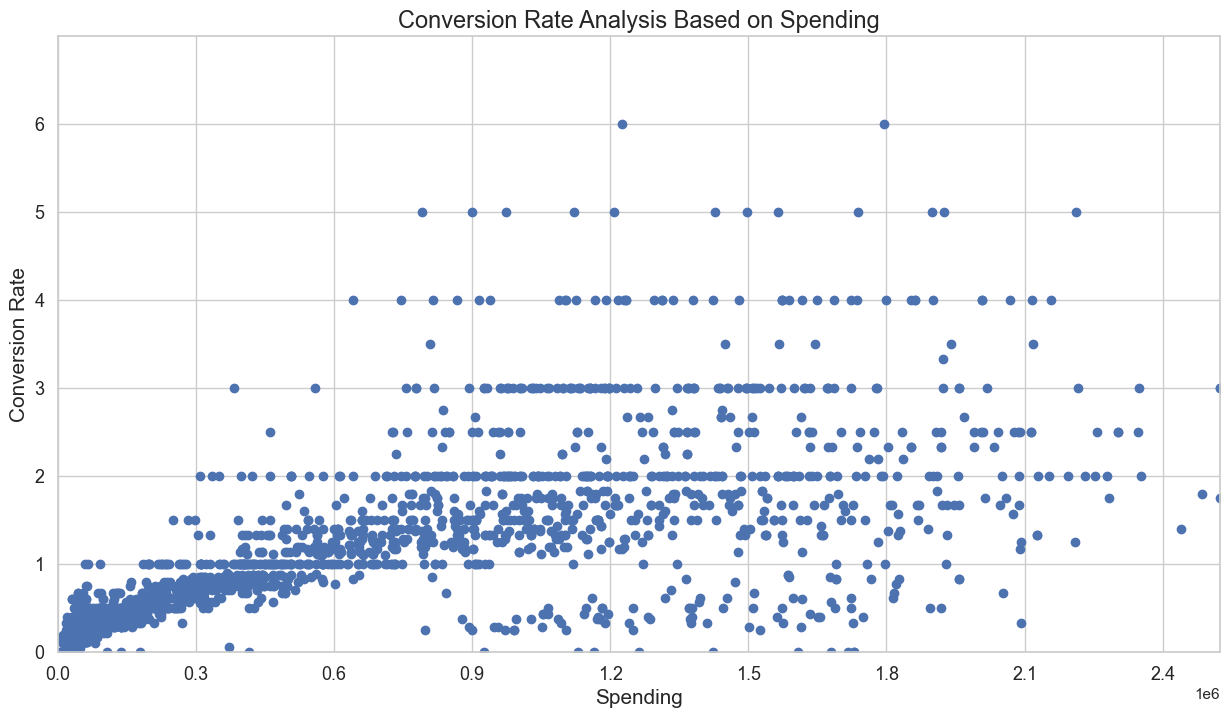

In [ ]:
plt.scatter(df['Spending'], df['Conversion_Rate'])
plt.xlabel('Spending', fontsize=15)
plt.xlim(0, 2525000)
plt.xticks(range(0, 2620000, 300000), fontsize=13)
plt.ylabel('Conversion Rate', fontsize=15)
plt.ylim(0, 7)
plt.yticks(range(0, 7, 1), fontsize=13)
plt.title('Conversion Rate Analysis Based on Spending', fontsize=17)
plt.show()

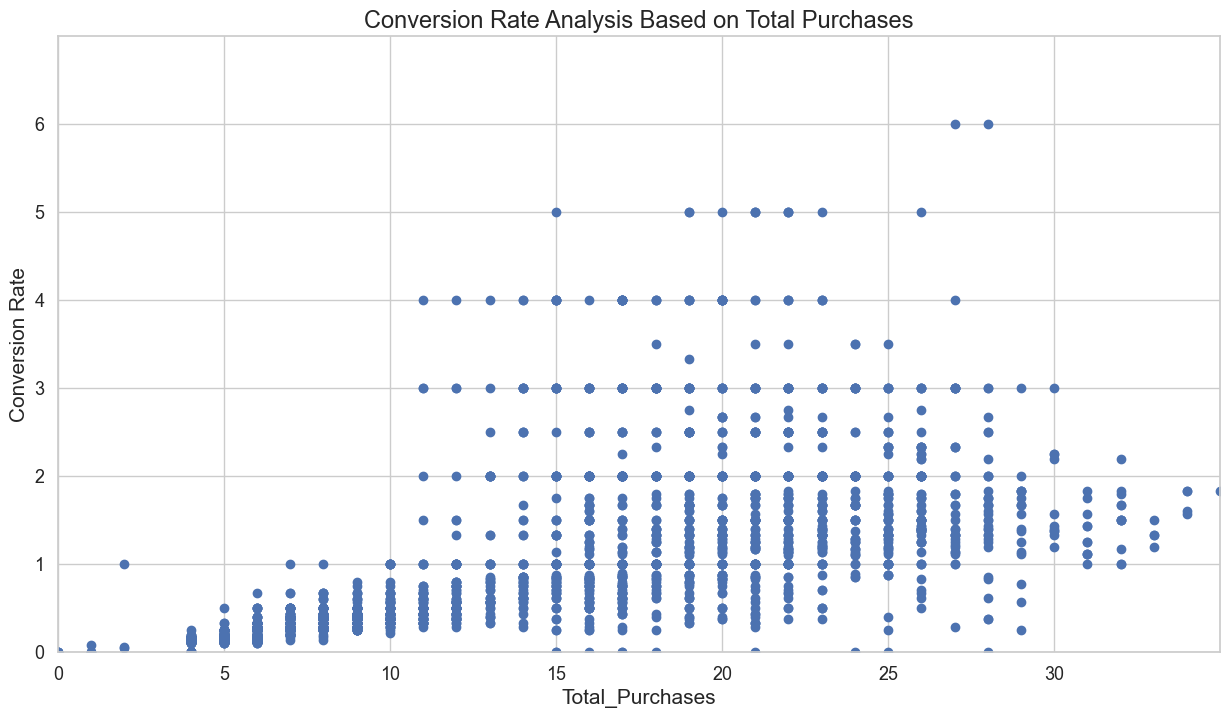

In [ ]:
plt.scatter(df['Total_Purchases'], df['Conversion_Rate'])
plt.xlabel('Total_Purchases', fontsize=15)
plt.xlim(0, 35)
plt.xticks(range(0, 35, 5), fontsize=13)
plt.ylabel('Conversion Rate', fontsize=15)
plt.ylim(0, 7)
plt.yticks(range(0, 7, 1), fontsize=13)
plt.title('Conversion Rate Analysis Based on Total Purchases', fontsize=17)
plt.show()

**Insight:**
Spending and total purchases have a positive correlation with the conversion rate, namely `0.52` (for spending) and `0.49` (for total purchases). However, it's important to note that these two features are not directly related to the conversion rate, as there isn't a specific threshold of spending or total purchases that explicitly indicates a higher conversion rate.

#### `Convertion_Rate` Analysis Based on `Age`

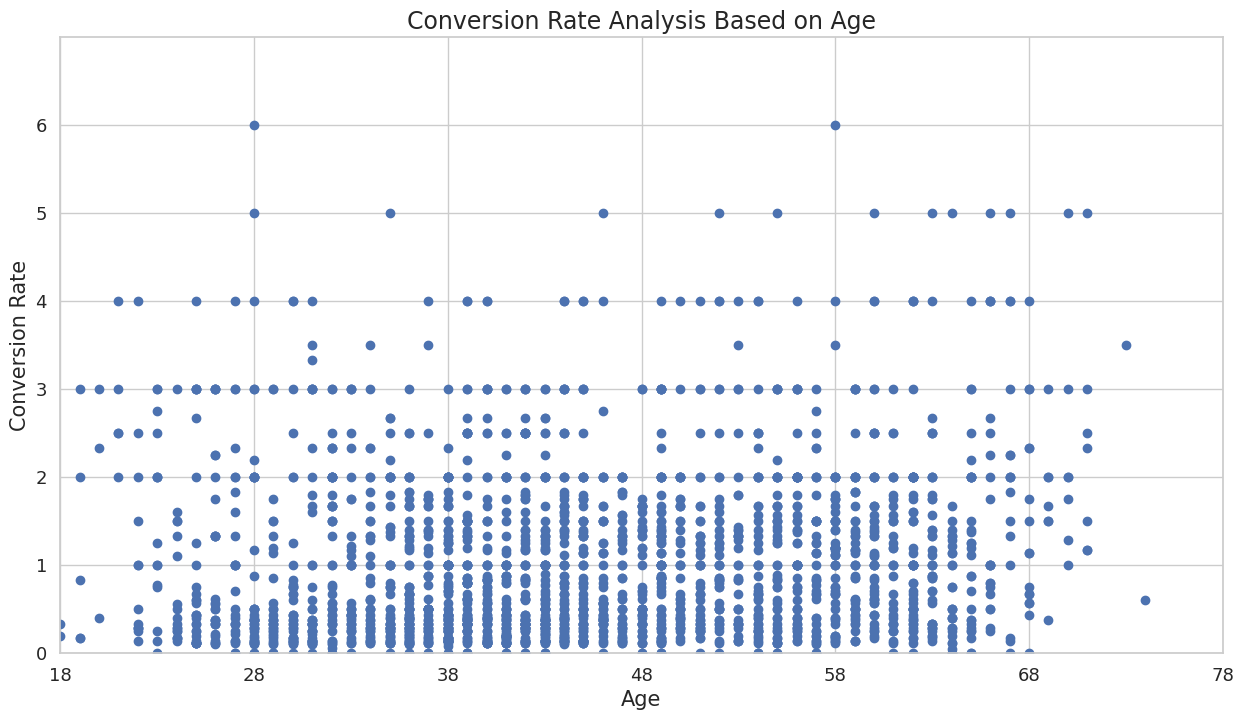

In [ ]:
plt.scatter(df['Age'], df['Conversion_Rate'])
plt.xlabel('Age', fontsize=15)
plt.xlim(18, 78)
plt.xticks(range(18, 79, 10), fontsize=13)
plt.ylabel('Conversion Rate', fontsize=15)
plt.ylim(0, 7)
plt.yticks(range(0, 7, 1), fontsize=13)
plt.title('Conversion Rate Analysis Based on Age', fontsize=17)
plt.show()

**Insight:**
- The same holds true for the age column, as well as for other unmentioned features; they are not directly related to the conversion rate, as there isn't a specific threshold of age that explicitly indicates a higher conversion rate.
- Considering these findings, it may be worthwhile to target customers with a monthly income exceeding `60.000.000 IDR` for a more specific approach in our marketing campaigns. However, to further determine the most suitable customer groups, clustering segmentation analysis is required to identify customer characteristics that can be targeted in our efforts to improve marketing campaign performance.

## Data Pre-processing

### Handling Missing Values

In [ ]:
# Check null values
df.isnull().sum()[df.isnull().sum() > 0]

Income    24
dtype: int64

**Summary:**
- There are missing values in the Income column (24 data points)
    > Handling missing values in the `Income` column will be done through imputation based on the median value within a subset of data.
    > - This involves replacing missing values in the `Income` column using the median value from data that shares the same `Spending` value. In cases where there are no data points with the same `Spending` value, the median will be calculated from the nearest lower and higher values within the `Income` column. <b> This approach is based on previous EDA results, which indicated a strong correlation between `Income` and `Spending`, with higher `Income` tending to be associated with higher `Spending`.</b>

In [ ]:
# Impute using the median value from data that shares the same Spending value.
df['Income'].fillna(df.groupby('Spending')['Income'].transform('median'), inplace=True)

In [ ]:
# Impute using the median value using Income values from the nearest lower and higher Spending values
df['Income'] = np.where((df['ID'] == 7244) & (df['Income'].isna()), 40016000, df['Income'])
df['Income'] = np.where((df['ID'] == 8996) & (df['Income'].isna()), 72237000, df['Income'])
df['Income'] = np.where((df['ID'] == 5798) & (df['Income'].isna()), 79008000, df['Income'])
df['Income'] = np.where((df['ID'] == 2437) & (df['Income'].isna()), 110045000, df['Income'])
df['Income'] = np.where((df['ID'] == 7187) & (df['Income'].isna()), 76639000, df['Income'])
df['Income'] = np.where((df['ID'] == 10339) & (df['Income'].isna()), 38494750, df['Income'])
df['Income'] = np.where((df['ID'] == 8720) & (df['Income'].isna()), 75219000, df['Income'])

In [ ]:
# Check null values
null_counts = df.isnull().sum()
if null_counts[null_counts > 0].empty:
    print("There are no null values in the dataset.")
else:
    print("Columns with null values and their counts:")
    print(null_counts[null_counts > 0])

There are no null values in the dataset.


### Handling Invalid Values
- Handling invalid values, including:
    - Changing the data type of the `Income` column to Integer after ensuring that the numbers after the decimal point are all filled with zeros, with the aim of aligning its values with other columns that contain financial data.
    - Converting the data type of the `Dt_Customer` column to datetime.
    - Simplifying values in the `Marital_Status` column to Single, Marriage, and Divorced to reduce its dimensionality.
    - Changing values in the `Z_CostContact` and `Z_Revenue` columns to thousands, assuming that there was a human error during data entry, where the data for prices or revenue in thousands of Indonesian Rupiah.

In [ ]:
# Change data type Income column
df['Income'] = df['Income'].astype(int)

# Change data type Dt_Customer column
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [ ]:
# Replacing values in the Marital_Status colomn
df['Marital_Status'] = df['Marital_Status'].replace({
    'Lajang': 'Single',
    'Bertunangan': 'Single',
    'Menikah': 'Married',
    'Cerai': 'Divorced',
    'Janda': 'Divorced',
    'Duda': 'Divorced'
})

In [ ]:
# Convert the values in the Z_CostContact and Z_Revenue columns to thousands.
df['Z_CostContact'] = df['Z_CostContact'] * 1000
df['Z_Revenue'] = df['Z_Revenue'] * 1000

### Handling Outliers

In [ ]:
# outlier_columns = ['Year_Birth', 'Income']

In [ ]:
# Handling outlier using IQR
#
# outliers1 = df.copy() # Makes a copy of the data to ensure that changes do not affect the dataframe to be used.
#
# print(f'The number of rows before filtering out the outliers: {len(outliers1)}')
#
# filtered_entries = np.array([True] * len(outliers1))
# for col in outlier_columns:
#     Q1 = outliers1[col].quantile(0.25)
#     Q3 = outliers1[col].quantile(0.75)
#     IQR = Q3 - Q1
#     low_limit = Q1 - (IQR * 1.5)
#     high_limit = Q3 + (IQR * 1.5)
#
#     filtered_entries = ((outliers1[col] >= low_limit) & (outliers1[col] <= high_limit)) & filtered_entries
#
# outliers1 = outliers1[filtered_entries]
#
# print(f'The number of rows after filtering out the outliers: {len(outliers1)}')

The number of rows before filtering out the outliers: 2240
The number of rows after filtering out the outliers: 2229


In [ ]:
# Handling outlier using Z-Score
#
# from scipy import stats
#
# outliers2 = df.copy() # Makes a copy of the data to ensure that changes do not affect the dataframe to be used.
#
# print(f'The number of rows before filtering out the outliers: {len(outliers2)}')
#
# filtered_entries = np.array([True] * len(outliers2))
#
# for col in outlier_columns:
#     zscore = abs(stats.zscore(outliers2[col])) # Calculate the absolute z-scores
#     filtered_entries = (zscore < 3) & filtered_entries # Keep those with an absolute z-score less than 3
#
# outliers2 = outliers2[filtered_entries] # Filter and retain only those with a z-score below 3
#
# print(f'The number of rows after filtering out the outliers: {len(outliers2)}')

The number of rows before filtering out the outliers: 2240
The number of rows after filtering out the outliers: 2229


In [ ]:
# Handling outliers using percentile 99
#
# outliers3 = df.copy()
#
# print("The number of rows before filtering out the outliers: ", outliers3.shape[0])
#
# percentile_99 = np.percentile(outliers3[outlier_columns], 99)
# data_no_outliers = outliers3[outliers3[outlier_columns] <= percentile_99]
#
# print("The number of rows before filtering out the outliers: ", data_no_outliers.shape[0])

The number of rows before filtering out the outliers:  2240
The number of rows before filtering out the outliers:  2240


In [ ]:
# Handling outliers using manually trimmed

print("The number of rows before filtering out the outliers: ", df.shape[0])

df = df[~(df['Year_Birth'] <= 1900)]
print("The number of rows after filtering out the outliers from Year_Birth column: {}".format(df.shape[0]))

df = df[~(df['Income'] >= 666666000)]
print("The number of rows after filtering out the outliers from Income column: {}".format(df.shape[0]))

df = df[~(df['Conversion_Rate'] >= 25.0)]
print("The number of rows after filtering out the outliers from Conversion_Rate column: {}".format(df.shape[0]))

The number of rows before filtering out the outliers:  2240
The number of rows after filtering out the outliers from Year_Birth column: 2237
The number of rows after filtering out the outliers from Income column: 2236
The number of rows after filtering out the outliers from Conversion_Rate column: 2233


**Summary:**
- After applying various methods to handle outliers, it was found that the most suitable approach is <b>`manually trimming`</b> the data. This decision was made to minimize the data loss since other methods such as `IQR` and `Z-score` resulted in the removal of a significant number of data points (more than 10), which is not desirable considering the dataset only consists of 2240 entries. On the other hand, using the `99th percentile method` didn't remove any data; however, there were concerns about extreme values in the `Income`, `Year Birth` and `Conversion_Rate` columns potentially affecting the results. Therefore, the <b>manually trimmed</b> approach was chosen. As for the remaining columns with outliers, a scaling method will be applied to mitigate their impact.

### Feature Encoding
Feature encoding will be performed using two techniques:
- Label encoding for the `Education`, `Age_Category`, and `Is_Parents` columns.
- One-hot encoding for the `Marital_Status` column.

#### Label Encoding

In [ ]:
# Mapping for Education column
map_education = {
    'SMA': 0,
    'D3': 1,
    'S1': 2,
    'S2': 3,
    'S3': 4
}
df['Education'] = df['Education'].map(map_education)

# Mapping for Age_Category column
map_age = {
    'Young Adult': 0,
    'Adult': 1,
    'Senior Adult': 2
}
df['Age_Category'] = df['Age_Category'].map(map_age)

# Mapping for Is_Parents column
map_parents = {
    'No': 0,
    'Yes': 1
}
df['Is_Parents'] = df['Is_Parents'].map(map_parents)

#### One-Hot Encoding

In [ ]:
df = pd.get_dummies(df, columns=['Marital_Status'])

In [ ]:
df_interpretation = df.copy()  # To view the interpretation of each cluster in its original values before rescaling

### Feature Scaling using Standardization

In [ ]:
scalling_columns = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Total_Child', 'Spending', 'Total_AcceptedCmp', 'Total_Purchases', 'Conversion_Rate', 'Z_CostContact', 'Z_Revenue']

In [ ]:
scaler = StandardScaler()
df[scalling_columns] = scaler.fit_transform(df[scalling_columns])
df[scalling_columns].describe()

Income  Kidhome  Teenhome  Recency  MntCoke  MntFruits  \
count 2233.00  2233.00   2233.00  2233.00  2233.00    2233.00   
mean    -0.00    -0.00      0.00     0.00     0.00       0.00   
std      1.00     1.00      1.00     1.00     1.00       1.00   
min     -2.34    -0.83     -0.93    -1.70    -0.90      -0.66   
25%     -0.78    -0.83     -0.93    -0.87    -0.83      -0.64   
50%     -0.03    -0.83     -0.93     0.03    -0.38      -0.46   
75%      0.77     1.03      0.91     0.86     0.60       0.17   
max      5.14     2.89      2.74     1.72     3.53       4.35   

       MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
count          2233.00          2233.00           2233.00       2233.00   
mean             -0.00            -0.00              0.00         -0.00   
std               1.00             1.00              1.00          1.00   
min              -0.74            -0.69             -0.66         -0.85   
25%              -0.67            -0.63             -0.64         -0.68   
50%              -0.44            -0.47             -0.46         -0.38   
75%               0.29             0.23              0.15          0.24   
max               6.90             4.05              4.20          4.82   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count            2233.00          2233.00              2233.00   
mean                0.00             0.00                -0.00   
std                 1.00             1.00                 1.00   
min                -1.21            -1.53                -0.91   
25%                -0.69            -0.77                -0.91   
50%                -0.17            -0.02                -0.23   
75%                 0.35             0.73                 0.46   
max                 6.56             7.12                 8.67   

       NumStorePurchases  NumWebVisitsMonth     Age  Total_Child  Spending  \
count            2233.00            2233.00 2233.00      2233.00   2233.00   
mean                0.00              -0.00   -0.00         0.00      0.00   
std                 1.00               1.00    1.00         1.00      1.00   
min                -1.79              -2.20   -2.32        -1.26     -1.00   
25%                -0.86              -0.96   -0.69        -1.26     -0.89   
50%                -0.25               0.28   -0.09         0.06     -0.35   
75%                 0.68               0.69    0.85         0.06      0.73   
max                 2.22               6.06    2.47         2.72      3.19   

       Total_AcceptedCmp  Total_Purchases  Conversion_Rate  Z_CostContact  \
count            2233.00          2233.00          2233.00        2233.00   
mean                0.00            -0.00            -0.00           0.00   
std                 1.00             1.00             1.00           0.00   
min                -0.44            -1.94            -1.10           0.00   
25%                -0.44            -0.89            -0.76           0.00   
50%                -0.44             0.02            -0.32           0.00   
75%                -0.44             0.80             0.47           0.00   
max                 5.45             3.80             5.19           0.00   

       Z_Revenue  
count    2233.00  
mean        0.00  
std         0.00  
min         0.00  
25%         0.00  
50%         0.00  
75%         0.00  
max         0.00

In [ ]:
df.sample(5)

ID  Year_Birth  Education  Income  Kidhome  Teenhome Dt_Customer  \
620   2782        1961          4    0.12    -0.83      0.91  2013-11-07   
572   8181        1978          1   -0.62     1.03     -0.93  2013-09-13   
579   5253        1956          3    0.12     1.03      0.91  2013-09-07   
102   4518        1979          2    1.57    -0.83      0.91  2013-04-20   
1605  5062        1963          4    0.10     1.03      0.91  2013-07-27   

      Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts  \
620     -0.90     0.14      -0.66            -0.62            -0.50   
572     -0.25    -0.75      -0.36            -0.52            -0.38   
579      1.24    -0.47      -0.33            -0.54            -0.38   
102      0.34     0.24       3.67             0.07             2.70   
1605     0.75    -0.80      -0.66            -0.72            -0.69   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
620              -0.66         -0.56               0.35             0.73   
572              -0.07         -0.38               0.35            -0.02   
579              -0.61         -0.77               1.90            -0.02   
102               2.58          1.31              -0.17             1.86   
1605             -0.66         -0.85              -0.69            -0.77   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
620                 -0.57               0.37               0.28             0   
572                 -0.57              -0.86               1.10             0   
579                 -0.23              -0.56               0.69             0   
102                  0.80               1.60              -0.13             0   
1605                -0.91              -1.17               1.10             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
620              0             0             0             0         0   
572              0             0             0             0         0   
579              0             0             0             0         0   
102              0             0             0             0         0   
1605             0             0             0             0         0   

      Z_CostContact  Z_Revenue  Response   Age  Age_Category  Total_Child  \
620            0.00       0.00         0  0.68             2         0.06   
572            0.00       0.00         0 -0.78             1         0.06   
579            0.00       0.00         0  1.10             2         1.39   
102            0.00       0.00         0 -0.86             1         0.06   
1605           0.00       0.00         0  0.50             2         1.39   

      Is_Parents  Spending  Total_AcceptedCmp  Total_Purchases  \
620            1     -0.34              -0.44             0.28   
572            1     -0.71              -0.44            -0.50   
579            1     -0.63              -0.44             0.15   
102            1      0.93              -0.44             1.58   
1605           1     -0.94              -0.44            -1.29   

      Conversion_Rate  Marital_Status_Divorced  Marital_Status_Married  \
620             -0.05                        0                       1   
572             -0.58                        0                       0   
579             -0.51                        0                       0   
102              0.78                        0                       0   
1605            -0.84                        0                       1   

      Marital_Status_Single  
620                       0  
572                       1  
579                       1  
102                       1  
1605                      0

### Feature Selection

In [ ]:
feature_modeling = df.drop(['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer', 'MntCoke', 'MntFruits', 'MntMeatProducts',
                            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                            'AcceptedCmp1', 'AcceptedCmp2', 'Z_CostContact', 'Z_Revenue', 'Age'], axis=1)

In [ ]:
interpretation_feature = df_interpretation.drop(['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer', 'MntCoke',  'MntFruits',
                                                 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                                                 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                                                 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
                                                 'Z_CostContact', 'Z_Revenue', 'Age'], axis=1)

**Summary:**
- The `ID` and `Year_Birth` columns were dropped as they were less useful for understanding customer personality.
- Other columns were dropped because there were already other features resulting from feature extraction that could represent the values of those columns.

## Modeling

### Cluster Determination: Inertia-Based Data Modeling Evaluation `(Elbow Method)`

In [ ]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(feature_modeling)

In [ ]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_)

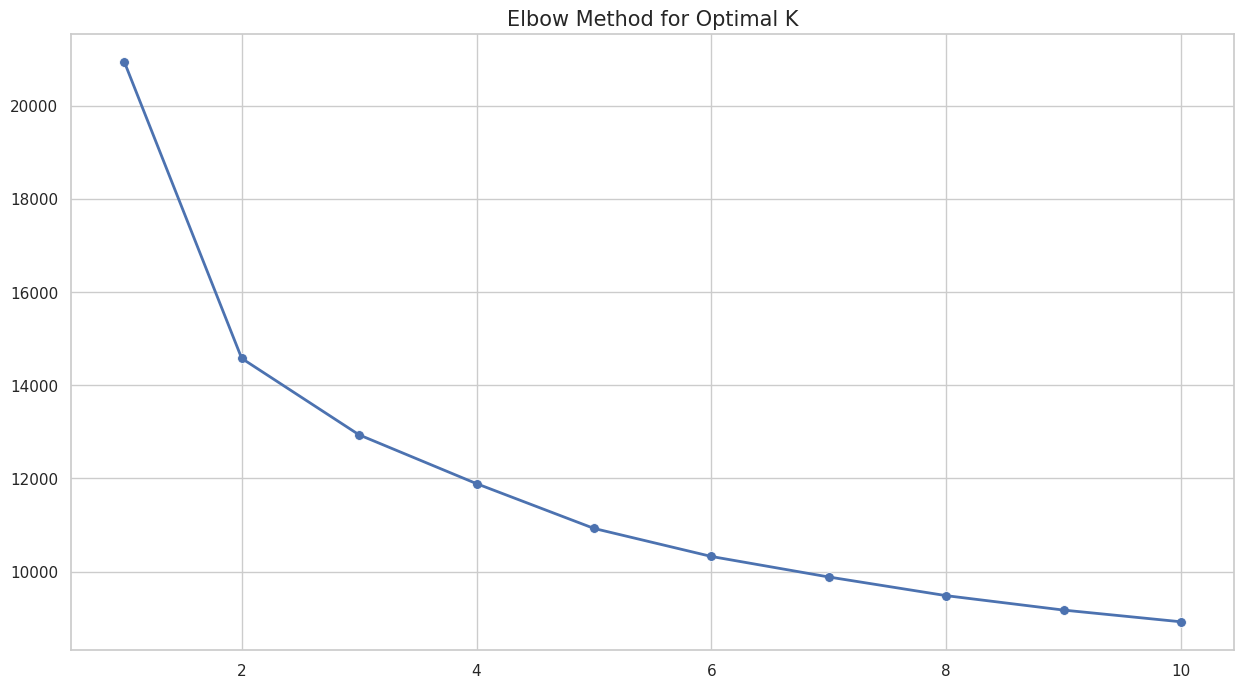

In [ ]:
sns.lineplot(x=range(1, 11), y=inertia, linewidth=2)
sns.scatterplot(x=range(1, 11), y=inertia, s=50)

plt.title("Elbow Method for Optimal K", fontsize=15)
plt.show()

In [ ]:
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0   30.39
1   11.26
2    8.09
3    8.08
4    5.51
5    4.26
6    4.05
7    3.27
8    2.74
9     NaN
dtype: float64

**Summary:**  To determine the optimal number of clusters, I have to select the value of k at the elbow i.e the point after which the distortion/inertia starts decreasing in a linear fashion. Thus for this dataset, I conclude that the optimal number of clusters for the dataset is 4.

### Data Modeling: Clustering Algorithm using K-Means

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(feature_modeling)
cluster_labels = kmeans.fit_predict(data_pca)

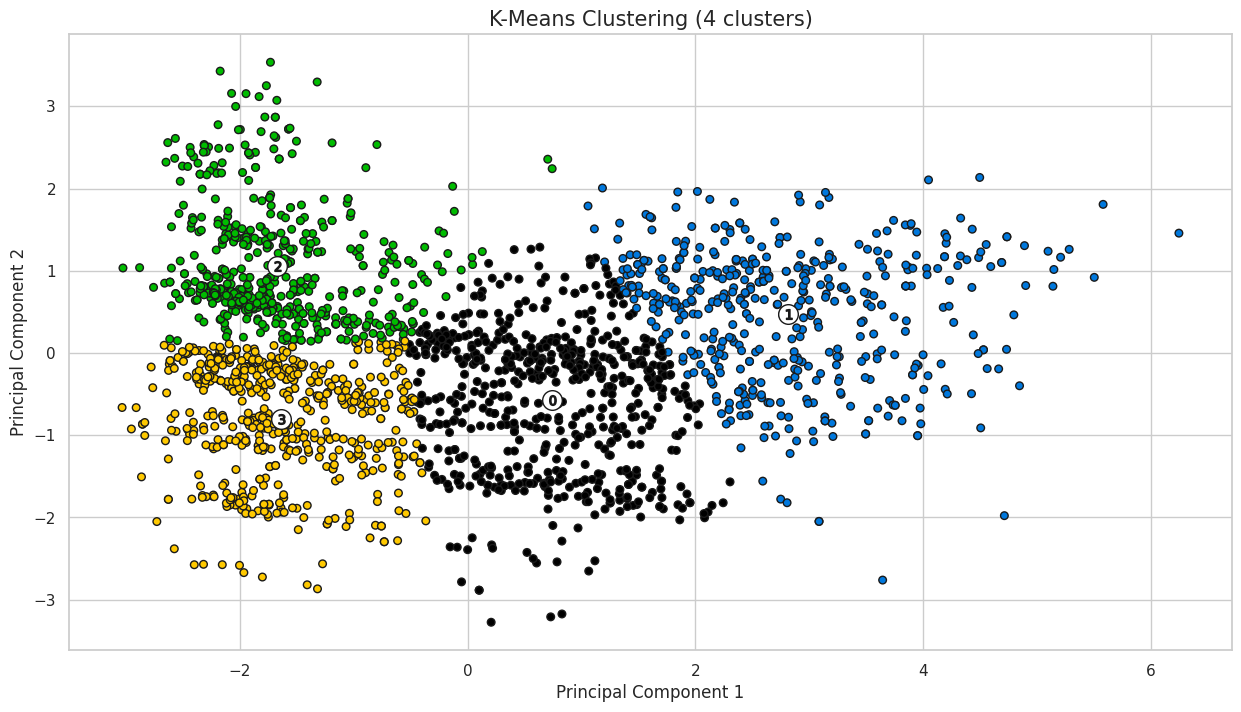

In [ ]:
colors = cm.nipy_spectral(cluster_labels.astype(float) / 4)
plt.scatter(data_pca[:, 0], data_pca[:, 1], marker='o', s=30, c=colors, edgecolor='k')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='o', c='white', alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker=f'${i}$', alpha=1, s=50, edgecolor='k')

plt.title("K-Means Clustering ({} clusters)".format(4), fontsize=15)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

### Data Modeling: Evaluation using Silhouette Analysis

For n_clusters = 2, The average silhouette_score is: 0.49913035351057433


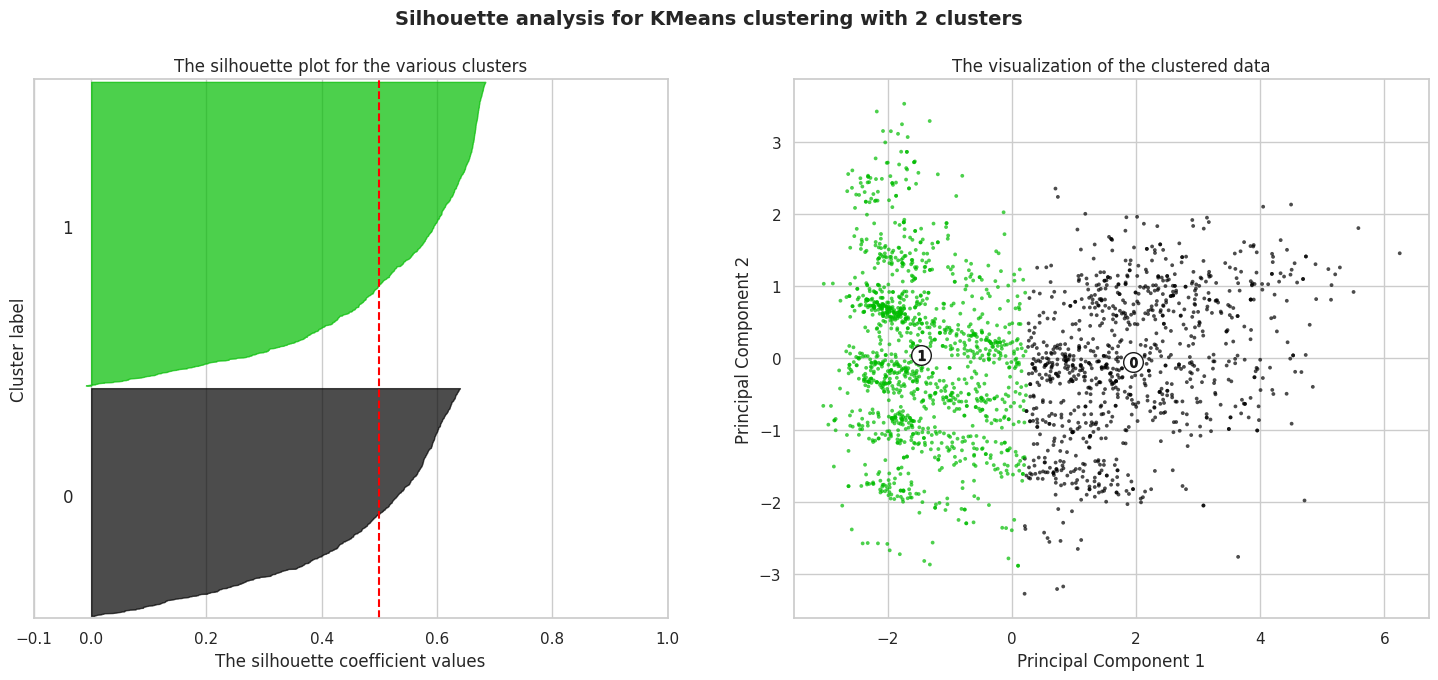

For n_clusters = 3, The average silhouette_score is: 0.4081759055202218


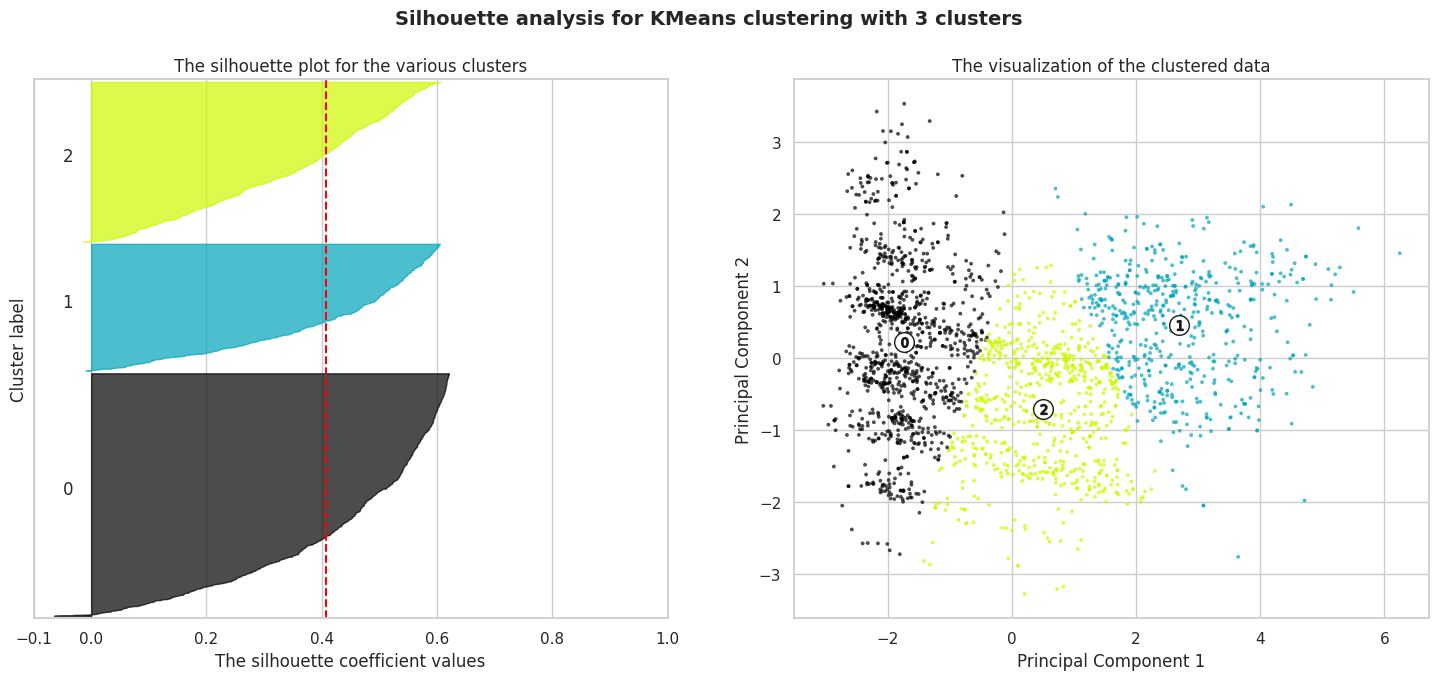

For n_clusters = 4, The average silhouette_score is: 0.38971638441520573


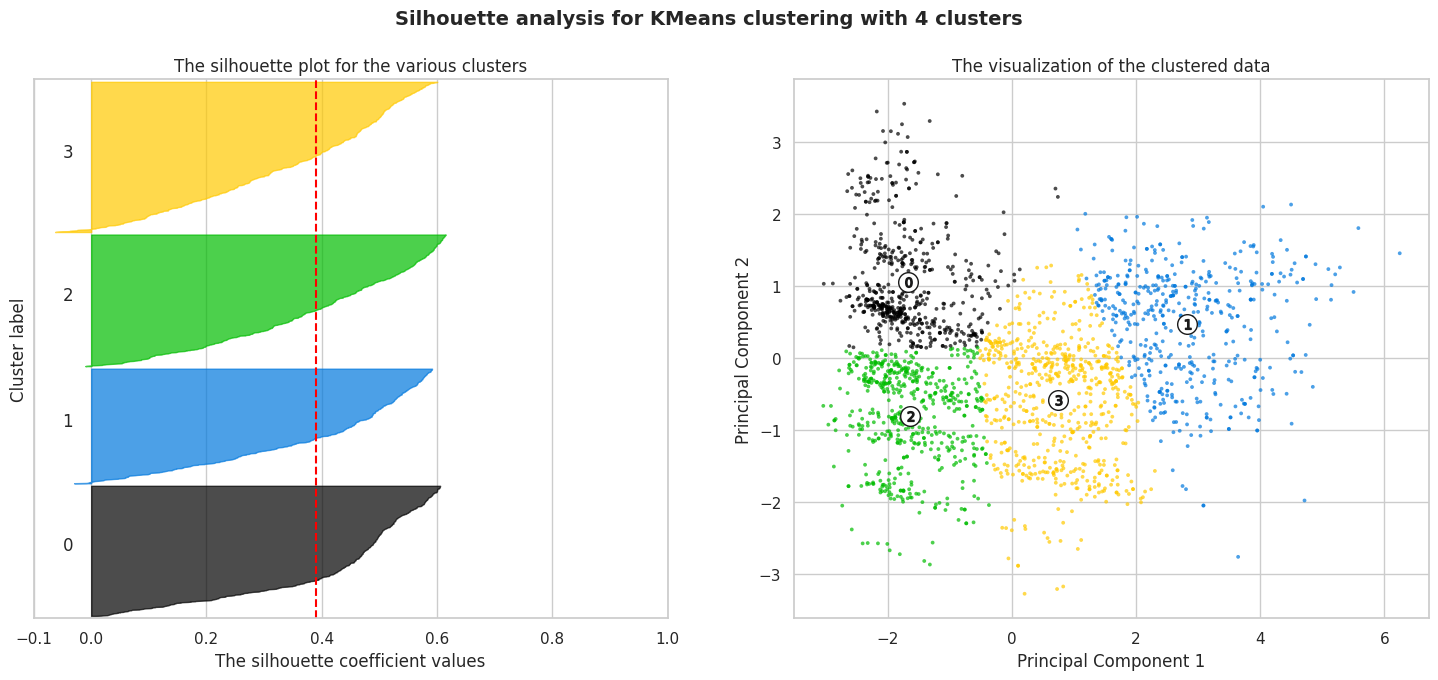

For n_clusters = 5, The average silhouette_score is: 0.38119136313243634


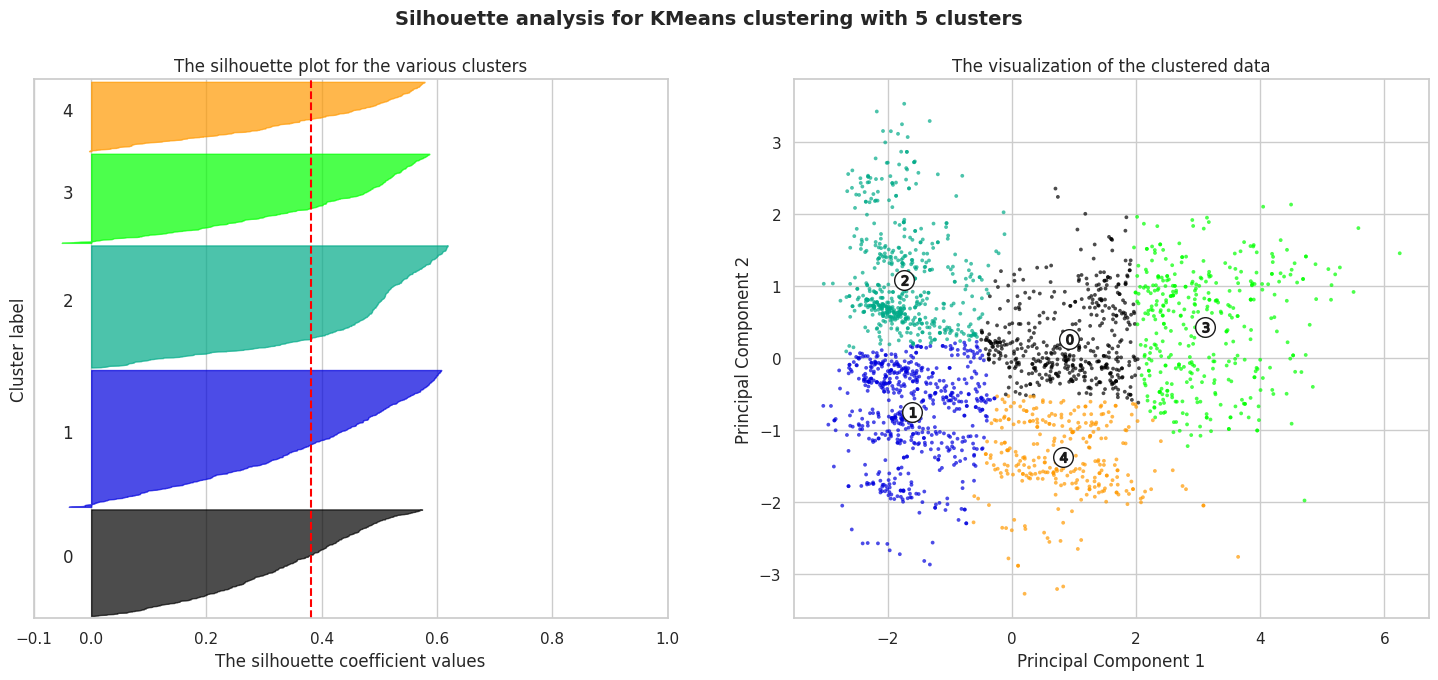

In [ ]:
for n_clusters in range(2, 6):
    clusterer = KMeans(n_clusters=n_clusters, n_init=10)
    cluster_labels = clusterer.fit_predict(data_pca)
    silhouette_avg = silhouette_score(data_pca, cluster_labels)
    sample_silhouette_values = silhouette_samples(data_pca, cluster_labels)

    # Create a subplot for each iteration
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data_pca) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_pca[:, 0], data_pca[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data")
    ax2.set_xlabel("Principal Component 1")
    ax2.set_ylabel("Principal Component 2")

    plt.suptitle(f"Silhouette analysis for KMeans clustering with {n_clusters} clusters", fontsize=14, fontweight="bold")

    # Print the average silhouette_score
    silhouette_avg = silhouette_score(data_pca, cluster_labels)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is: {silhouette_avg}")

    plt.show()

**Insight:**
Based on the results of the evaluation using silhouette analysis, it is evident that the most optimal number of clusters is 4, as it exhibits a sufficiently high coefficient value, and the data distribution within each cluster is fairly balanced (not skewed).
> However, the coefficient value obtained is still quite low, as it is less than 0.5, indicating that the separation of data between clusters is not very clear. This is suspected to be due to the complex structure of the dataset being analyzed, making it somewhat challenging to divide it into multiple clusters due to the similarities in customer personalities.

## Business Insight

In [ ]:
feature_modeling['Cluster_Label'] = cluster_labels

In [ ]:
interpretation_feature['Cluster_Label'] = cluster_labels

In [ ]:
cluster_summary = interpretation_feature.groupby('Cluster_Label')[['Education', 'Income', 'Recency', 'Complain', 'Response', 'Age_Category', 'Total_Child', 'Is_Parents', 'Spending', 'Total_AcceptedCmp', 'Total_Purchases', 'Conversion_Rate', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single']].median().T
table_text = cluster_summary.to_string()
print(table_text)

**Summary:**  
Based on the clustering results, we can conclude that there are four distinct customer groups:
- <b>0:</b> `Planners Customers`, these are customers who tend to plan their purchases.
- <b>1:</b> `Prime Customers`, this group represents the primary target for increasing revenue due to their superior characteristics.
- <b>2:</b> `High Potential Customers`, these customers exhibit high business potential and may require specialized marketing strategies.
- <b>3:</b> `Low Spending Customers`, this group have low spending patterns.  
```
Considering the observed customer behavior, the ideal target audience would be the High Potential and Prime customers. These customers exhibit higher income, spending, and total purchases, making them more likely to enhance overall performance and boost marketing campaign effectiveness.
```

In [ ]:
map_cluster = {
    0: 'Planners',
    1: 'Prime',
    2: 'High Potential',
    3: 'Low Spending'
}
interpretation_feature['Cluster_Label'] = interpretation_feature['Cluster_Label'].map(map_cluster)

In [ ]:
cluster_counts = interpretation_feature['Cluster_Label'].value_counts().reset_index()

cluster_counts = cluster_counts.sort_values(by='Cluster_Label')

plt.figure(figsize=(10, 3))
bars = plt.barh(cluster_counts['index'], cluster_counts['Cluster_Label'], alpha=0.7)
plt.xlabel('Total Customer')
#plt.ylabel('Cluster Label')

for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 15, bar.get_y() + bar.get_height() / 2, str(cluster_counts['Cluster_Label'].values[i]), ha='center', va='center')

plt.title('Total Customer in Each Cluster')
plt.show()

In [ ]:
spending_summary = interpretation_feature.groupby('Cluster_Label')[['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].median().T

In [ ]:
purchases_summary = interpretation_feature.groupby('Cluster_Label')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].median().T

### Customer Target Cluster Analysis Based on Spending

In [ ]:
cluster_1_data = spending_summary['Prime']
products = cluster_1_data.index
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

size = 0.4

fig, ax = plt.subplots()
ax.pie(cluster_1_data, labels=products, colors=colors, autopct='%1.1f%%', startangle=140, radius=1)

circle = plt.Circle((0, 0), size, color='white')
ax.add_artist(circle)

plt.text(0, 0, 'Prime', horizontalalignment='center', verticalalignment='center', fontsize=17, fontweight='bold')

# plt.title('Total Spending Percentage of Prime Cluster')

plt.axis('equal')
plt.show()

In [ ]:
cluster_2_data = spending_summary['High Potential']
products = cluster_2_data.index
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

size = 0.4

fig, ax = plt.subplots()
ax.pie(cluster_1_data, labels=products, colors=colors, autopct='%1.1f%%', startangle=140, radius=1)

circle = plt.Circle((0, 0), size, color='white')
ax.add_artist(circle)

plt.text(0, 0, 'High Potential', horizontalalignment='center', verticalalignment='center', fontsize=17, fontweight='bold')

# plt.title('Total Spending Percentage of High Potential Cluster')

plt.axis('equal')
plt.show()

**Insight:**
In terms of spending on the products offered, customers in both the 'Prime' and 'High Potential' clusters tend to allocate a significant portion of their spending on Coke, followed by Meat Products.

### Customer Target Cluster Analysis Based on Purchases

In [ ]:
cluster_1_purchases = purchases_summary['Prime']
purchases = cluster_1_purchases.index
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

size = 0.4

fig, ax = plt.subplots()
ax.pie(cluster_1_purchases, labels=purchases, colors=colors, autopct='%1.1f%%', startangle=140, radius=1)

circle = plt.Circle((0, 0), size, color='white')
ax.add_artist(circle)

plt.text(0, 0, 'Prime', horizontalalignment='center', verticalalignment='center', fontsize=17, fontweight='bold')

# plt.title('Total Transaction Percentage of Prime Cluster')

plt.axis('equal')
plt.show()

In [ ]:
cluster_2_purchases = purchases_summary['High Potential']
purchases = cluster_2_purchases.index
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

size = 0.4

fig, ax = plt.subplots()
ax.pie(cluster_2_purchases, labels=purchases, colors=colors, autopct='%1.1f%%', startangle=140, radius=1)

circle = plt.Circle((0, 0), size, color='white')
ax.add_artist(circle)

plt.text(0, 0, 'High Potential', horizontalalignment='center', verticalalignment='center', fontsize=17, fontweight='bold')

# plt.title('Total Transaction Percentage of High Potential Cluster')

plt.axis('equal')
plt.show()

**Insight:**
Based on the transactions conducted, customers in the Prime cluster are more likely to make purchases in the store and through catalogs. On the other hand, customers in the High Potential cluster tend to engage in transactions at physical stores as well as through the company's website.

<b>Based on the previous analysis of customer behavior, the following recommendations can be made:</b>
1. For Prime Customers:
Offer a 10% discount or bundle deals for Coca-Cola and meat products.
Provide special reward points or cashback for every purchase of Coca-Cola and meat products.
Offer exclusive deals such as early access to new product offers or free delivery if they purchase on the same day the offer is presented.
2. For High Potential Customers:
Implement cross-selling and upselling strategies by suggesting complementary products or services that match their preferences, such as dessert products or sauces.
Provide an additional 5-10% discount when they purchase products online.
Offer a subscription program that ensures regular delivery of their favorite products, such as Coca-Cola and meat.